# Lending Club Case Study

### Step1: Problem Statement and data collection

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
Our Aim is to identify the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, 
i.e. the variables which are strong indicators of default

##### Importing required libraries

In [5]:
# Libraries for Numerical and Data analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings and ignore warnings
import warnings
warnings.filterwarnings("ignore")

##### Data Frame display settings

In [7]:
# Display settings to show max 300 cols and 500 rows
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",500)

##### Data loading

In [9]:
# Read loan data file and disply 5 rows

loan_data = pd.read_csv('loan.csv')

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
# Check last rows for footer data
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Step 2: Exploration and data cleaning

Once we have loaded the dataset, we can start with the process.

Knowing the dimensions and data types of the object we are working with is vital. For this, we need the `shape` attribute to obtain the dimensions of the object and the `info()` function to know the typology and the amount of non-null values:

In [12]:
# Obtain the dimentions
loan_data.shape

(39717, 111)

In [13]:
# Obtain information about data types and non-null values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


- There are a total of 39717 rows and 111 columns are there in given loan data set.
- The data has 87 numerical characteristics and 24 categorical characteristics.

### Data Cleaning

1. Check for duplicates
2. Fix columns with NaN values
3. Standardise values
4. Filtering data - drop columns not usefull for analysis
5. Fix missing values

#### Check for Duplicates

In [17]:
# Check duplicates
loan_data.duplicated().sum()

0

- There are no duplicate values present in loan data set

#### Fix Columns with NaN values

In [20]:
#percentage of null or missing values
null_val_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

#columns which have more than 0% missing values
null_val_perc[ null_val_perc > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.59
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

- Drop columns having all values as NaN ( Some columns have all values are null)
- Drop columns having Null percentage as more than 30%

In [22]:
# Drop columns having all values as NaN
loan_data.drop(null_val_perc[null_val_perc > 30].index, axis = 1, inplace = True)

In [23]:
# Check loan_data frame after dropping Nan columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

###### After dropping NaN columns loan_data frame have 53 columns

In [25]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### Drop columns not usefull for analysis

##### Drop columns which are having same value to all rows, not usefull for analysis

In [28]:
#Finding number of unique values in each column
loan_data.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [29]:
# Find columns having unique values for all rows
# 0    39717 - delinq_amnt have all values as '0'
print(loan_data.delinq_amnt.value_counts()) 

# 0.0    39661 - collections_12_mths_ex_med have - most values as '0' and 'NA' 
print(loan_data.collections_12_mths_ex_med.value_counts()) 

# 0    39717 - acc_now_delinq - have all values as '0'
print(loan_data.acc_now_delinq.value_counts()) 

# 0.0    39678 - tax_liens - have values as '0.0' & 'NA'
print(loan_data.tax_liens.value_counts()) 

# INDIVIDUAL    39717 -  application_type - have single value as 'INDIVIDUAL'
print(loan_data.application_type.value_counts()) 

# 1    39717 - policy_code - have uniqur value as '1'
print(loan_data.policy_code.value_counts()) # 1    39717

# 0.0    39661 - collections_12_mths_ex_med - Have values as '0.0' & 'NA'
print(loan_data.collections_12_mths_ex_med.value_counts()) 

# f    39717 - initial_list_status - have all values as 'f'
print(loan_data.initial_list_status.value_counts())

# 0.0    39661 - chargeoff_within_12_mths - have values as '0.0' & 'NA'
print(loan_data.chargeoff_within_12_mths.value_counts())

# n    39717 - pymnt_plan has value as 'n'
print(loan_data.pymnt_plan.value_counts())

delinq_amnt
0    39717
Name: count, dtype: int64
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
acc_now_delinq
0    39717
Name: count, dtype: int64
tax_liens
0.0    39678
Name: count, dtype: int64
application_type
INDIVIDUAL    39717
Name: count, dtype: int64
policy_code
1    39717
Name: count, dtype: int64
collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64
initial_list_status
f    39717
Name: count, dtype: int64
chargeoff_within_12_mths
0.0    39661
Name: count, dtype: int64
pymnt_plan
n    39717
Name: count, dtype: int64


In [30]:
# Drop above columns having same value to all rows, which is not use full for analysis

loan_data.drop(
                ['delinq_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tax_liens','application_type', 
                 'policy_code', 'collections_12_mths_ex_med','initial_list_status', 'chargeoff_within_12_mths',
                 'initial_list_status', 'chargeoff_within_12_mths', 'pymnt_plan'], 
                axis = 1, inplace = True
                )

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

##### Drop columns which are not useful to access the risky loan applicant

In [33]:
drop_cols = ['id','member_id','funded_amnt','funded_amnt_inv','installment','emp_title', 'url', 
             'title', 'zip_code','earliest_cr_line', 'inq_last_6mths', 'revol_bal','out_prncp','out_prncp_inv', 
             'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
             'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt','last_pymnt_d','last_credit_pull_d'
             ]

loan_data.drop(columns = drop_cols, axis = 1, inplace = True)

In [34]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

In [35]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,3,0,83.70%,9,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,3,0,9.40%,4,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,98.50%,10,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,10,0,21%,37,0.0
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.90%,38,0.0


#### Standardizing the data

- "int_rate" & 'revol_util' described as an object column, remove '%' and convert into float

In [38]:
# remove '%' and convert to 'float' data type
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype('float')

loan_data['revol_util'] = loan_data['revol_util'].str.replace('%', '').astype('float')

In [39]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

#### Fix missing values

In [41]:
loan_data.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [42]:
loan_data.emp_length.isnull().sum()

1075

In [43]:
loan_data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [44]:
loan_data['emp_length'].fillna('0', inplace = True)

In [45]:
loan_data.emp_length.isnull().sum()

0

##### Impute missing values for revol_util

In [47]:
loan_data.revol_util.value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [48]:
loan_data.revol_util.isnull().sum()

50

In [49]:
# Calculate mean and median for 'revol_util'
loan_data.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [50]:
mean = loan_data.revol_util.mean()
median = loan_data.revol_util.median()
print('Mean = {}\nMedian = {}'.format(mean, median))

Mean = 48.83215241888723
Median = 49.3


In [51]:
loan_data.revol_util.fillna(median, inplace = True)

In [52]:
loan_data.revol_util.isnull().sum()

0

In [53]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,3,0,83.7,9,0.0
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,3,0,9.4,4,0.0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,2,0,98.5,10,0.0
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,10,0,21.0,37,0.0
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,15,0,53.9,38,0.0


In [54]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  float64
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            39717 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  delinq_2yrs           39717 non-null  int64  
 15  open_acc           

In [55]:
# Derive year and month from issue_d
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.strftime('%b')

In [56]:
# Drop 'issue_d' it is not required
loan_data.drop(['issue_d'], axis = 1, inplace = True)

In [57]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,83.7,9,0.0,2011,Dec
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,9.4,4,0.0,2011,Dec
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,98.5,10,0.0,2011,Dec
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,21.0,37,0.0,2011,Dec
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,15,0,53.9,38,0.0,2011,Dec


##### Remove the rows with loan staatus as 'Current'. Because for our analysis will consider loan status with 'Fully paid' & 'Charged Off'

In [59]:
loan_data[loan_data['loan_status'] == 'Current']

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,15,0,53.9,38,0.0,2011,Dec
32,10000,60 months,15.96,C,C5,2 years,RENT,29120.0,Verified,Current,debt_consolidation,FL,22.83,0,11,0,63.6,31,0.0,2011,Dec
39,12500,60 months,12.69,B,B5,1 year,RENT,27000.0,Verified,Current,debt_consolidation,IL,16.04,0,6,0,50.0,24,0.0,2011,Dec
86,14000,60 months,17.27,D,D3,4 years,RENT,28000.0,Verified,Current,other,WA,6.34,0,5,0,79.4,10,0.0,2011,Dec
95,15300,60 months,22.06,F,F4,6 years,RENT,85000.0,Verified,Current,credit_card,VA,20.58,0,14,0,89.7,27,0.0,2011,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15972,10400,60 months,6.00,E,E3,5 years,MORTGAGE,29000.0,Source Verified,Current,credit_card,TX,10.84,0,7,0,95.6,15,0.0,2011,May
15981,6000,60 months,10.37,B,B3,1 year,RENT,24000.0,Source Verified,Current,car,NY,11.05,0,6,0,0.2,9,0.0,2011,Apr
16361,19200,60 months,10.74,B,B4,5 years,MORTGAGE,100000.0,Verified,Current,small_business,NJ,4.43,0,6,0,0.0,10,0.0,2011,Apr
16609,9350,60 months,10.00,B,B2,8 years,RENT,66000.0,Not Verified,Current,car,NY,4.84,0,4,0,5.9,7,0.0,2011,Apr


In [60]:
loan_data = loan_data[loan_data['loan_status'] != 'Current']

In [61]:
loan_data.shape

(38577, 21)

In [62]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  float64
 3   grade                 38577 non-null  object 
 4   sub_grade             38577 non-null  object 
 5   emp_length            38577 non-null  object 
 6   home_ownership        38577 non-null  object 
 7   annual_inc            38577 non-null  float64
 8   verification_status   38577 non-null  object 
 9   loan_status           38577 non-null  object 
 10  purpose               38577 non-null  object 
 11  addr_state            38577 non-null  object 
 12  dti                   38577 non-null  float64
 13  delinq_2yrs           38577 non-null  int64  
 14  open_acc              38577 non-null  int64  
 15  pub_rec               38

In [63]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,83.7,9,0.0,2011,Dec
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,9.4,4,0.0,2011,Dec
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,98.5,10,0.0,2011,Dec
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,21.0,37,0.0,2011,Dec
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,9,0,28.3,12,0.0,2011,Dec


### Outliers detection in numerical columns

In [65]:
num_cols = loan_data.select_dtypes(exclude = 'object').columns
num_cols

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_year'],
      dtype='object')

##### Outlier nalysis for loan_amnt, int_rate, annual_inc, dti, revol_util

In [67]:
def find_min_max_upper_lower_whisker_by_column(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    print('Q1 of {} - {}'.format(data.name, Q1))
    print('Q3 of {} - {}'.format(data.name, Q3))
    IQR = Q3 - Q1
    
    # calulate lower range & Upper range
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print('Lower whisker of {} - {}'.format(data.name, lower_range))
    print('Upper whisker of {} - {}'.format(data.name, upper_range))
    return lower_range, upper_range

##### Outlier analysis on loan_amnt

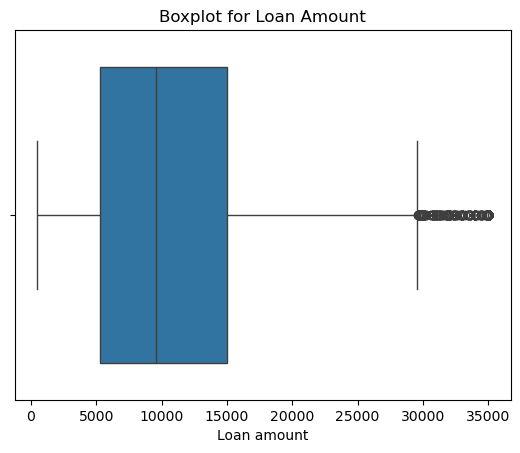

In [69]:
# Box plot for 'loan_amt'
sns.boxplot(data = loan_data, x = 'loan_amnt')
plt.title('Boxplot for Loan Amount', )
plt.xlabel('Loan amount')
plt.show()

In [70]:
loan_data.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [71]:
find_min_max_upper_lower_whisker_by_column(loan_data['loan_amnt'])

Q1 of loan_amnt - 5300.0
Q3 of loan_amnt - 15000.0
Lower whisker of loan_amnt - -9250.0
Upper whisker of loan_amnt - 29550.0


(-9250.0, 29550.0)

##### Insight
1. Min loan amt is 500 and Max is 35000
2. Average loan amount is 11047
3. Upper whisler is around at 30000
4. 75% of the applicant opted loan amount bellow 15000. So hence max loan applicants are between 500 to 15000
5. Upper bound and Max values are almost near. So no outliers in loan_amnt

##### Outlier analysis on int_rate

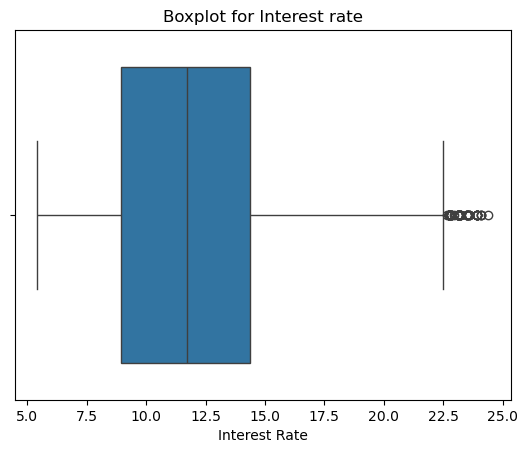

In [74]:
# Box plot for 'loan_amt'
sns.boxplot(data = loan_data, x = 'int_rate')
plt.title('Boxplot for Interest rate', )
plt.xlabel('Interest Rate')
plt.show()

In [75]:
loan_data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [76]:
find_min_max_upper_lower_whisker_by_column(loan_data['int_rate'])

Q1 of int_rate - 8.94
Q3 of int_rate - 14.38
Lower whisker of int_rate - 0.7799999999999976
Upper whisker of int_rate - 22.540000000000003


(0.7799999999999976, 22.540000000000003)

##### Insight
1. Min Interest rate is 5.42 and Max is 24.4
2. Average Interest rate is 11.93
3. Upper whisler is around at 22.54
4. 75% of the applicant opted loan amount bellow 15%. 
5. Upper bound and Max values are almost near. So no outliers in Interest rate

##### Outlier analysis on annual_inc

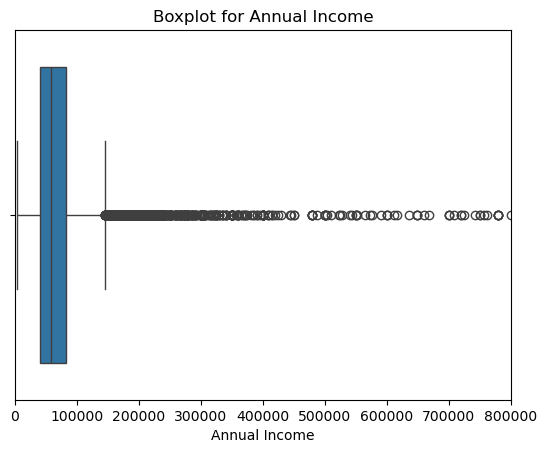

In [79]:
# Box plot for 'annual_inc'
sns.boxplot(data = loan_data, x = 'annual_inc')
plt.title('Boxplot for Annual Income', )
plt.xlabel('Annual Income')
plt.xlim(0, 800000)
plt.show()

In [80]:
loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [81]:
lowr, uppr = find_min_max_upper_lower_whisker_by_column(loan_data['annual_inc'])

Q1 of annual_inc - 40000.0
Q3 of annual_inc - 82000.0
Lower whisker of annual_inc - -23000.0
Upper whisker of annual_inc - 145000.0


- Its clearly indicating the are outlies exists after 145000
- Its disconneted from general distribution and there is huge increase in value

In [83]:
outliers_annul_inc = loan_data[(loan_data['annual_inc'] < lowr) | (loan_data['annual_inc'] > uppr)]
outliers_annul_inc

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month
74,14400,36 months,8.90,A,A5,< 1 year,OWN,150000.0,Source Verified,Fully Paid,debt_consolidation,NY,14.85,0,12,0,55.0,38,0.0,2011,Dec
80,35000,60 months,17.27,D,D3,3 years,MORTGAGE,150000.0,Verified,Fully Paid,home_improvement,NY,7.51,0,11,0,53.3,31,0.0,2011,Dec
170,25000,36 months,12.42,B,B4,2 years,RENT,225000.0,Verified,Fully Paid,debt_consolidation,NJ,8.32,1,11,0,34.6,23,0.0,2011,Dec
185,35000,36 months,10.65,B,B2,2 years,MORTGAGE,168000.0,Verified,Fully Paid,debt_consolidation,TX,3.17,1,16,0,1.4,22,0.0,2011,Dec
298,8000,36 months,11.71,B,B3,1 year,RENT,150000.0,Not Verified,Fully Paid,credit_card,NY,2.48,1,5,0,56.2,8,0.0,2011,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39694,5000,36 months,7.43,A,A2,8 years,MORTGAGE,150000.0,Not Verified,Fully Paid,home_improvement,GA,0.00,0,2,0,19.5,19,NaN,2007,Jul
39703,3000,36 months,10.28,C,C1,2 years,MORTGAGE,200000.0,Not Verified,Fully Paid,home_improvement,NY,0.00,1,5,0,0.0,8,NaN,2007,Jul
39706,5000,36 months,8.07,A,A4,< 1 year,MORTGAGE,180000.0,Not Verified,Fully Paid,home_improvement,WI,5.55,0,12,0,26.3,39,NaN,2007,Jul
39707,5000,36 months,9.33,B,B3,2 years,MORTGAGE,180000.0,Not Verified,Fully Paid,home_improvement,WI,11.93,0,16,0,39.2,38,NaN,2007,Jul


In [84]:
outliers_annul_inc.shape

(1762, 21)

- There are total 1762 rows present below lower whisker and above upper whisker.
- Its not advisable to remove 1762 rows
- So will go with quantile computation for indentifing outliers in annual_inc

In [86]:
print('Loan data dataframe shape before removing outliers', loan_data.shape)

Loan data dataframe shape before removing outliers (38577, 21)


In [87]:
quantile_data = loan_data.annual_inc.quantile([0.5, 0.75, 0.90, 0.95, 0.97, 0.98, 0.99])
quantile_data

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [88]:
per_99_annual_inc = loan_data.annual_inc.quantile(0.99)
per_99_annual_inc

234143.99999999878

In [89]:
# Outliers above 0.99 quantile is
loan_data[loan_data['annual_inc'] >= per_99_annual_inc].shape

(386, 21)

In [90]:
# remove outliers above 0.99 quantile
loan_data = loan_data[loan_data['annual_inc'] < per_99_annual_inc]
print('Loan data set size after removing outliers', loan_data.shape)

Loan data set size after removing outliers (38191, 21)


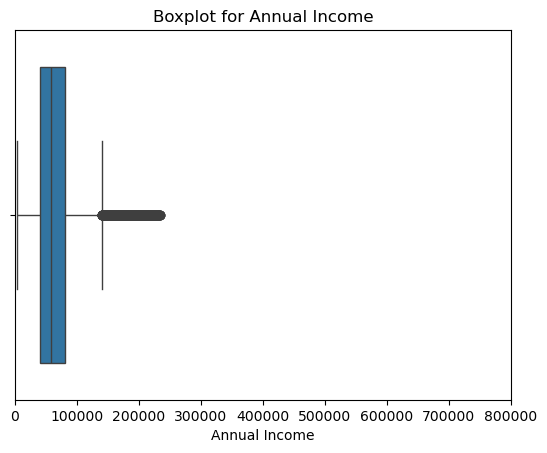

In [91]:
# Box plot for 'annual_inc' after removing outliers
sns.boxplot(data = loan_data, x = 'annual_inc')
plt.title('Boxplot for Annual Income', )
plt.xlabel('Annual Income')
plt.xlim(0, 800000)
plt.show()

In [92]:
loan_data.annual_inc.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
5%        24000.000000
10%       30000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
90%      111000.000000
95%      135000.000000
99%      189000.000000
max      234000.000000
Name: annual_inc, dtype: float64

##### Insights
- Average income of borrowers is around 65K
- Maximum browers have income below 80K

##### Outlier analysis on dti

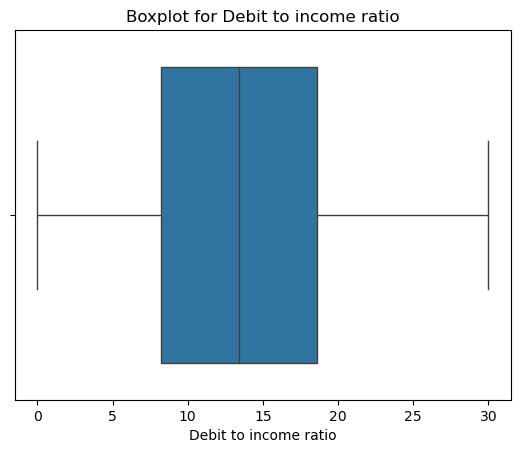

In [95]:
# Box plot for 'dti' - Debit to income ration
sns.boxplot(data = loan_data, x = 'dti')
plt.title('Boxplot for Debit to income ratio', )
plt.xlabel('Debit to income ratio')
plt.show()

In [96]:
loan_data.dti.describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

In [97]:
find_min_max_upper_lower_whisker_by_column(loan_data['dti'])

Q1 of dti - 8.21
Q3 of dti - 18.6
Lower whisker of dti - -7.375
Upper whisker of dti - 34.185


(-7.375, 34.185)

##### Insights
- DTI(Debit to income ratio) is a personal finance measure calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- DTI is with in the range
- It seems no outliers exists

##### Outlier analysis on revol_util

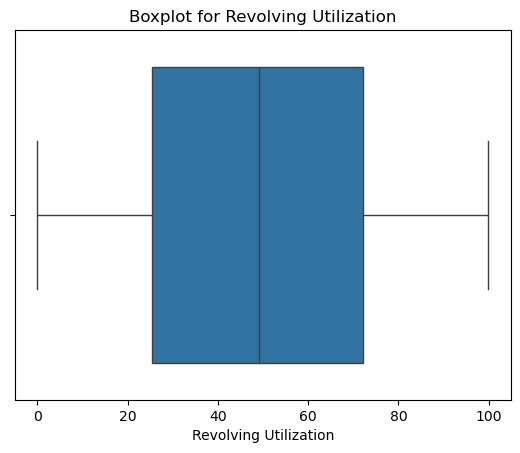

In [100]:
# Box plot for 'revol_util'
sns.boxplot(data = loan_data, x = 'revol_util')
plt.title('Boxplot for Revolving Utilization', )
plt.xlabel('Revolving Utilization')
plt.show()

In [101]:
loan_data.revol_util.describe()

count    38191.000000
mean        48.693328
std         28.317847
min          0.000000
25%         25.300000
50%         49.100000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

In [102]:
find_min_max_upper_lower_whisker_by_column(loan_data['revol_util'])

Q1 of revol_util - 25.3
Q3 of revol_util - 72.2
Lower whisker of revol_util - -45.05000000000001
Upper whisker of revol_util - 142.55


(-45.05000000000001, 142.55)

##### Insights
- Average of Revolving utilization rate is around 49%

### Univariate analysis

A **univariate variable** is a statistical term used to refer to a set of observations of an attribute. That is, the column-by-column analysis of the DataFrame. To do this, we must distinguish whether a variable is categorical or numerical, as the body of the analysis and the conclusions that can be drawn will be different.

A histogram is a graphical representation of the distribution of a data set. It is also used to understand the frequency of the data. By looking at a histogram, we can understand if the data is skewed towards one extreme, if it is symmetrical, if it has many outliers, and so on. With the representation of each variable, we can determine that:

#### Analysis on numeric variables

#### Plot : Loan Amount

In [108]:
loan_data.loan_amnt.describe()

count    38191.000000
mean     10962.265979
std       7266.157660
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

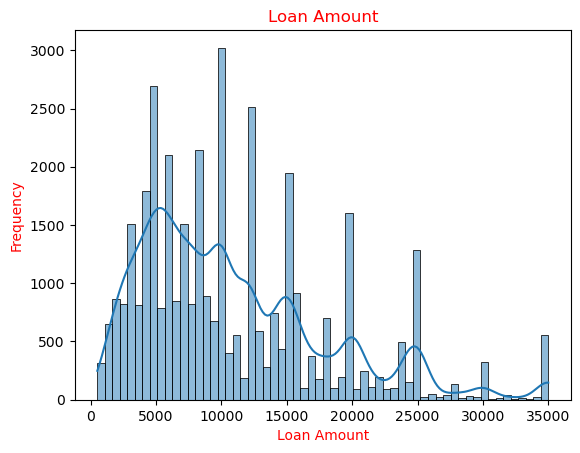

In [109]:
sns.histplot(loan_data, x = 'loan_amnt', kde = True)
plt.title("Loan Amount", color = 'Red')
plt.xlabel('Loan Amount', color = 'Red')
plt.ylabel('Frequency', color = 'Red')
plt.show()

1. Data distribution against loan amount is righly skewed. That means, most of the people take take loan less amount than high amount
2. max customers takr loan amount as 10000

##### Plot - Interest Rate

In [112]:
loan_data.int_rate.describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

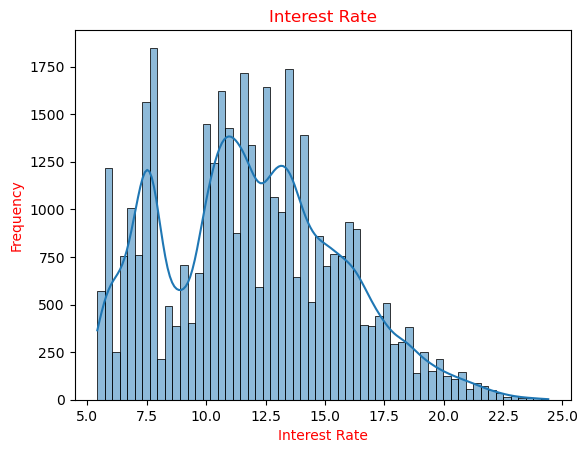

In [113]:
sns.histplot(data = loan_data, x = 'int_rate', kde = True)
plt.title("Interest Rate", color = 'Red')
plt.xlabel('Interest Rate', color = 'Red')
plt.ylabel('Frequency', color = 'Red')
plt.show()

1. Data distribution against Interest rate is righly skewed. 
That means, most of the people take loan with less interest rate than high.
2. Max number customers take loan inbetween 7.5% to 13%

##### Plot - Annual Income

In [116]:
loan_data.annual_inc.describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

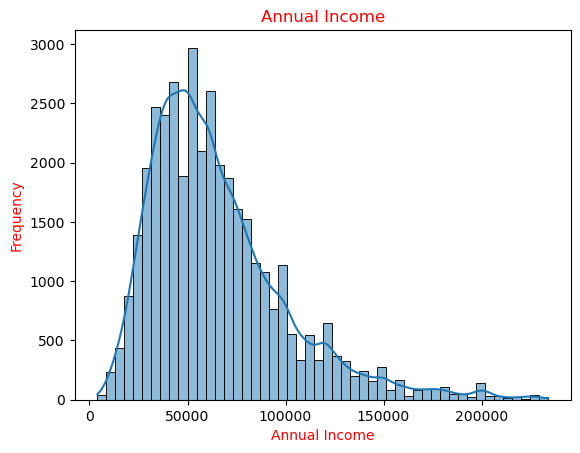

In [117]:
sns.histplot(data = loan_data, x = 'annual_inc', kde = True, bins = 50)
plt.title("Annual Income", color = 'Red')
plt.xlabel('Annual Income', color = 'Red')
plt.ylabel('Frequency', color = 'Red')
plt.show()

1. Average income of borrowers is around 65K
2. Maximum browers have income below 80K
3. Data distribution agaist Annual income is rightly skewed. Means people take loan with high income is very less than Avg income

##### Plot - Debt to income ratio

In [120]:
loan_data.dti.describe()

count    38191.000000
mean        13.333491
std          6.657843
min          0.000000
25%          8.210000
50%         13.430000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

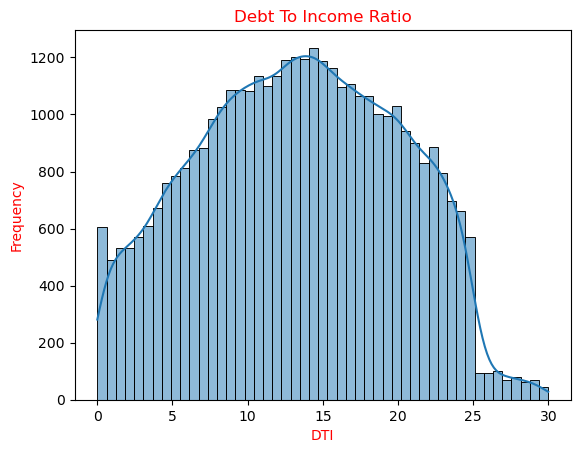

In [121]:
sns.histplot(data = loan_data, x = 'dti', kde = True)
plt.title("Debt To Income Ratio", color = 'Red')
plt.xlabel('DTI', color = 'Red')
plt.ylabel('Frequency', color = 'Red')
plt.show()

1. Distribution of DTI is symmentrical
2. The number of loan applicants increased as DTI increased, when DTI goes beyond 15 the loan applicants descreased
3. Histrogram shows, very few applicants having DTI ratio below 5 and aboue 25 

##### Plot - Public Record Bankruptcies

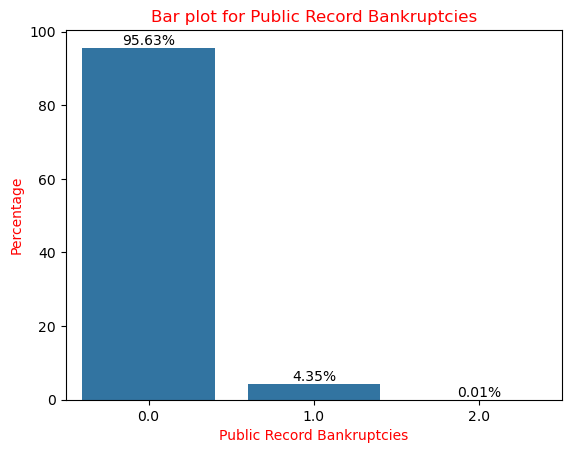

In [124]:
sns.barplot(data = loan_data.pub_rec_bankruptcies.value_counts(normalize = True)*100)
plt.title("Bar plot for Public Record Bankruptcies", color = 'Red')
plt.xlabel('Public Record Bankruptcies', color = 'Red')
plt.ylabel('Percentage', color = 'Red')

# Display counts on each bar
plt.bar_label(plt.gca().containers[0], fmt= '%.2f%%')
plt.show()

1. Around 96% of loan applicants not having any history of public record of bankruptcies
2. Only 4% of loan applicants having history of public record of bankruptcies

#### Plot - Issue Year 

In [127]:
loan_data.issue_year.value_counts()

issue_year
2011    20318
2010    11412
2009     4662
2008     1552
2007      247
Name: count, dtype: int64

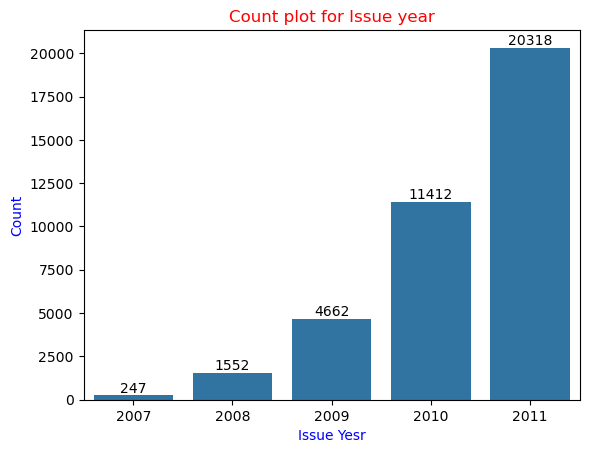

In [128]:
ax = sns.countplot(data = loan_data, x = 'issue_year')
plt.title("Count plot for Issue year", color = 'Red')
plt.xlabel('Issue Yesr', color = 'Blue')
plt.ylabel('Count', color = 'Blue')

# Disply the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)
plt.show()

1. More number of applicants take loan in **Year 2011**.
2. In Year 2011 Financial cricies triggered a deep global recession. Economic cricies could be the reason to take more loans in 2011
    



#### Analysis of categorical variables

A **categorical variable** is a type of variable that can be one of a limited number of categories or groups. These groups are often nominal (e.g., the color of a car: red, blue, black, etc., but none of these colors is inherently "greater" or "better" than the others) but can also be represented by finite numbers.

#### Plot - Issue Month

In [132]:
loan_data.issue_month.value_counts()

issue_month
Dec    4175
Nov    3969
Oct    3709
Sep    3463
Aug    3363
Jul    3321
Jun    3146
May    2887
Apr    2808
Mar    2659
Jan    2354
Feb    2337
Name: count, dtype: int64

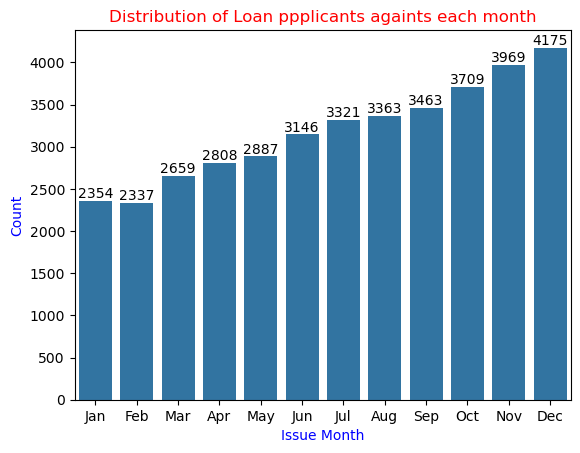

In [133]:
issue_month_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

ax = sns.countplot(x = loan_data['issue_month'].sort_values(), order = issue_month_order)
plt.title("Distribution of Loan ppplicants againts each month", color = 'Red')
plt.xlabel('Issue Month', color = 'Blue')
plt.ylabel('Count', color = 'Blue')

# Disply the counts on each bar using bar_label
for container in ax.containers:
    ax.bar_label(container)
plt.show()

1. Number of applicants taking loan is incrasing eveyr month and **December** had highest peak.
2. Christmas and Newyear Holidays could be the reason  

##### Plot - Grade grade

1. Loan grade is a rating assigned by Lending Club (LC), to categorize loans based on their creditworthiness and associated risk. 
2. This grade helps both lenders and borrowers understand the risk assessment of a loan. 
3. Loan grades starts from A to G, with A the highest grade (loweer risk) and G be the lowest grade (higher risk). 
4. Each grade have sub-grades (e.g., A1, A2, A3) for finer differentiation.

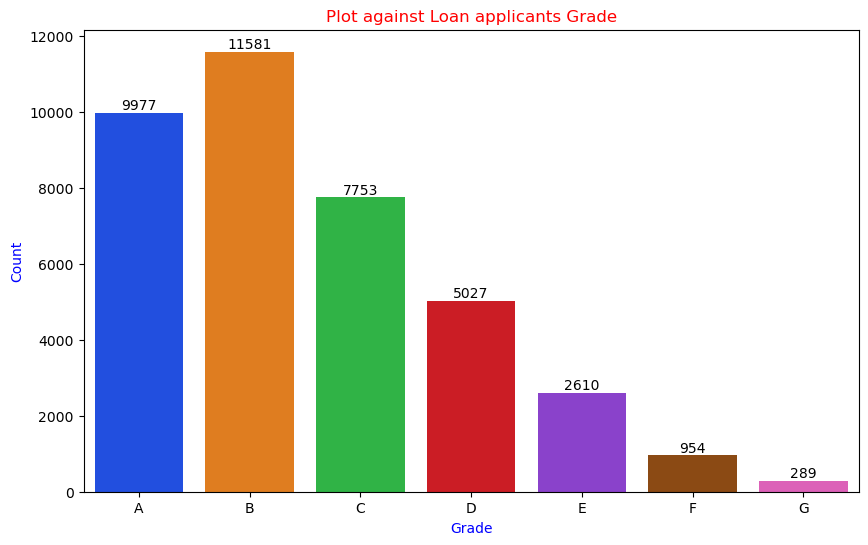

In [137]:
plt.figure(figsize = [10,6])

ax = sns.countplot(x = loan_data['grade'].sort_values(), palette = 'bright')

plt.title('Plot against Loan applicants Grade', color = 'red')
plt.xlabel('Grade', color = 'blue')
plt.ylabel('Count', color = 'blue')

# display count of applicants by loan subgrade on top of bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. Plot shows more number of loan applicants fall under grades **A to C**.
2. It shows people with good creditscore have been granted loans to maintain lower to moderate risk

##### Plot - Sub grade

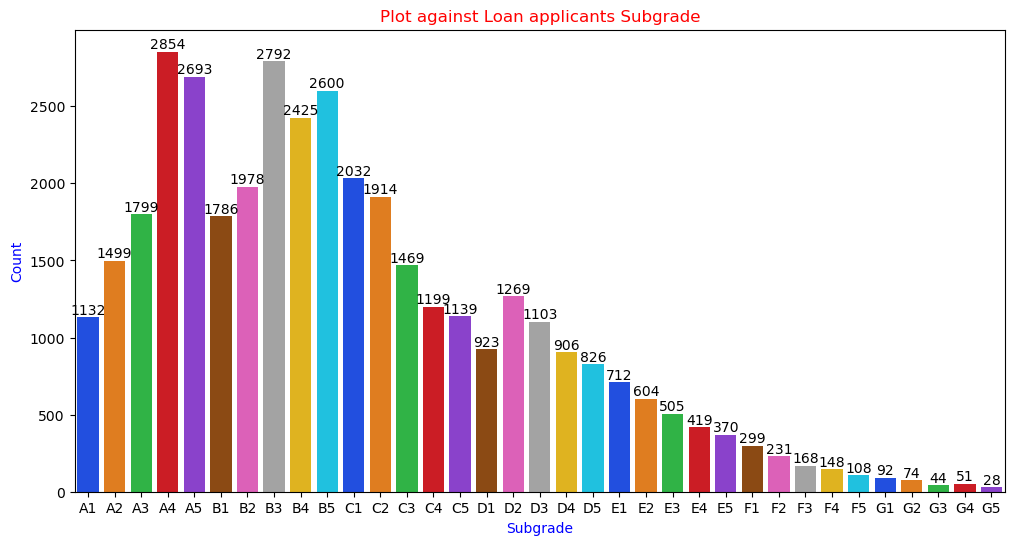

In [140]:
plt.figure(figsize = [12,6])

ax = sns.countplot(x = loan_data['sub_grade'].sort_values(), palette = 'bright')

plt.title('Plot against Loan applicants Subgrade', color = 'red')
plt.xlabel('Subgrade', color = 'blue')
plt.ylabel('Count', color = 'blue')

# display count of applicants by loan subgrade on top of bar using bar_label
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. Plot shows, most of loan applicants under Subgrade of **A4, A5, B3, B4, B5**. It shows, signifiacnt of loan applicants fall under these grads
2. It shows that gradual decrease of loan applicants from **A1 to G5**. It suggests, less loans are granted in lower subgrades

##### Plot - term

In [143]:
loan_data.term.value_counts()

term
36 months    28819
60 months     9372
Name: count, dtype: int64

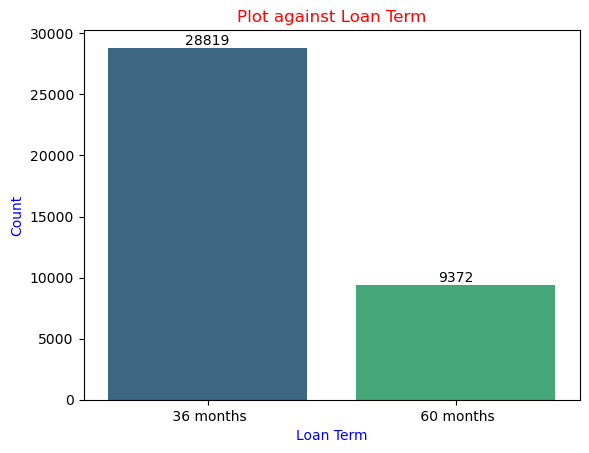

In [144]:
ax = sns.countplot(data = loan_data, x = 'term', palette = 'viridis' )

plt.title('Plot against Loan Term', color = 'Red')
plt.xlabel('Loan Term', color = 'Blue')
plt.ylabel('Count', color = 'Blue') 

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. Plot shows majority of loan applicants opt the loan fpr **36months(3 yers) term**

#### Plot Employee length(Experience)

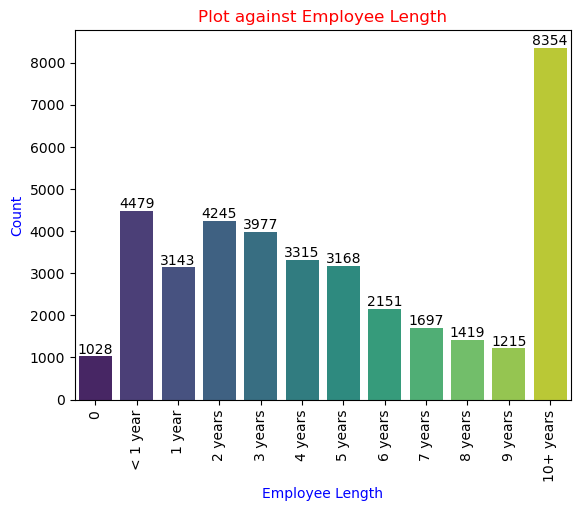

In [147]:
order_emp_length = ['0','< 1 year','1 year','2 years','3 years','4 years','5 years',
                    '6 years','7 years','8 years','9 years','10+ years']

ax = sns.countplot(x = loan_data['emp_length'].sort_values(), palette = 'viridis', order = order_emp_length )

plt.title('Plot against Employee Length', color = 'Red')
plt.xlabel('Employee Length', color = 'Blue')
plt.ylabel('Count', color = 'Blue') 
plt.xticks(rotation = 90)

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. Plot shows - There is a peak at **10+ years**. It indicars more number of applicants taking loan at higher employee experience
2. Which means stable income draws more applicants to take loan.
3. Better **income should helps to manage financially to rpay the loan**

#### Plot - Home ownership

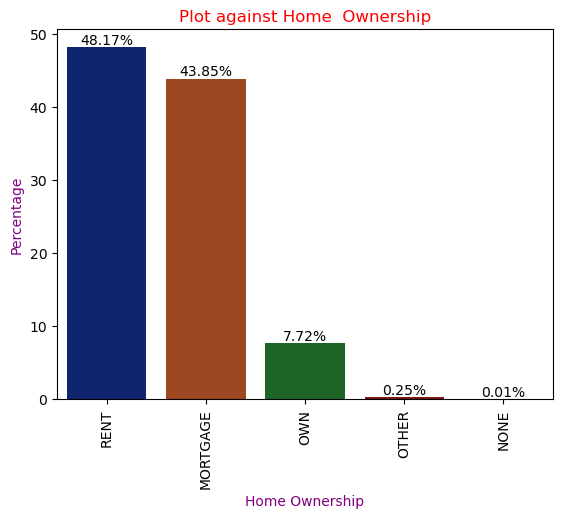

In [150]:
ax = sns.barplot(data = loan_data['home_ownership'].value_counts(normalize = True)*100, palette = 'dark')

plt.title('Plot against Home  Ownership', color = 'Red')
plt.xlabel('Home Ownership', color = 'purple')
plt.ylabel('Percentage', color = 'purple') 
plt.xticks(rotation = 90)

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")

plt.show()

1. Plot shows **Rent and Mortgage** holders are the majotiry of loan applicants.

#### Plot - Verificaton status 

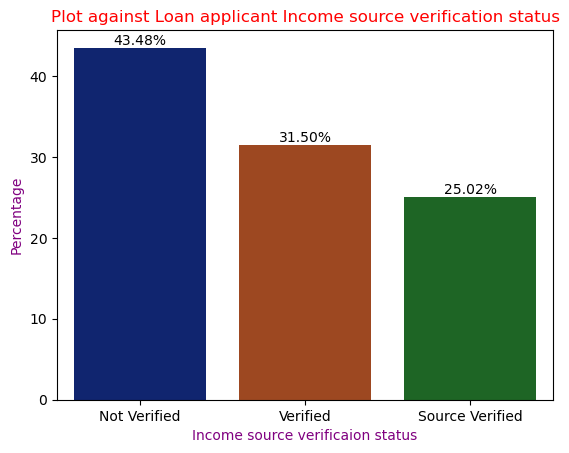

In [153]:
ax = sns.barplot(data = loan_data['verification_status'].value_counts(normalize = True)*100, palette = 'dark')

plt.title('Plot against Loan applicant Income source verification status', color = 'Red')
plt.xlabel('Income source verificaion status', color = 'purple')
plt.ylabel('Percentage', color = 'purple') 
#plt.xticks(rotation = 90)

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")

plt.show()

1. Plot shows, most of loan applicants income source is **Not verified, it creates a risk**

#### Plot - Loan Status loan_status

In [156]:
loan_data.loan_status.value_counts(normalize = True) * 100

loan_status
Fully Paid     85.378754
Charged Off    14.621246
Name: proportion, dtype: float64

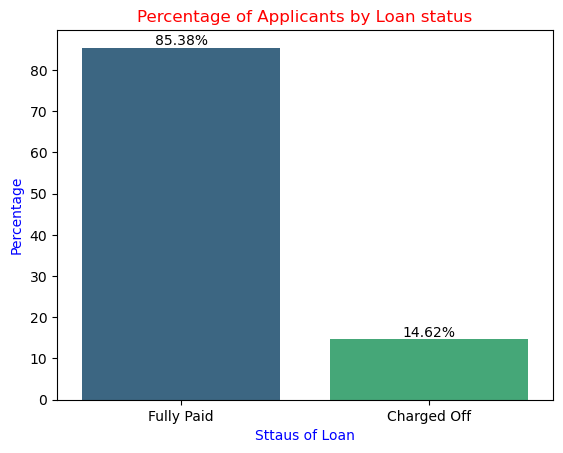

In [157]:
ax = sns.barplot(data = loan_data['loan_status'].value_counts(normalize = True) * 100, palette = 'viridis')

plt.title('Percentage of Applicants by Loan status', color = 'red')
plt.xlabel('Sttaus of Loan', color = 'blue')
plt.ylabel('Percentage', color = 'blue')

# display percentage of applicants by loan status on top of bar using bar_label
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")

plt.show()

1. 85% of loan applicants paid the loan fully
2. **Nearly 15% of loan applicants are defalted**, and couldnot paid the loan

#### Plot - purpose

In [160]:
loan_data.purpose.value_counts()

purpose
debt_consolidation    17917
credit_card            4987
other                  3831
home_improvement       2797
major_purchase         2129
small_business         1723
car                    1491
wedding                 917
medical                 674
moving                  570
vacation                375
house                   357
educational             323
renewable_energy        100
Name: count, dtype: int64

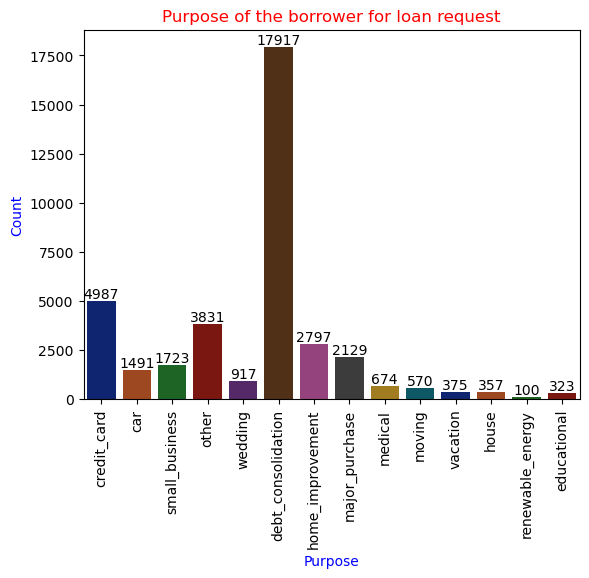

In [161]:
#plt.figure(figsize=[10,7])

ax = sns.countplot(data = loan_data, x = 'purpose', palette = 'dark' )

plt.title('Purpose of the borrower for loan request', color = 'Red')
plt.xlabel('Purpose', color = 'Blue')
plt.ylabel('Count', color = 'Blue') 
plt.xticks(rotation = 90)

# Display counts on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1. The plot indicates, most of the people taken loan for **debt_consolidation** then followed by **credit_card**

#### Plot -  Address state

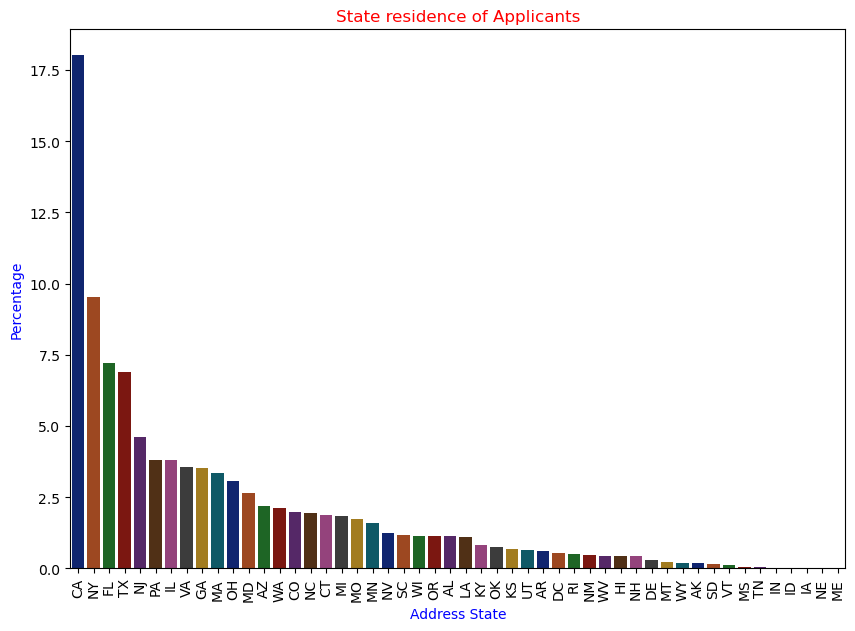

In [164]:
plt.figure(figsize=[10,7])

sns.barplot(data = loan_data['addr_state'].value_counts(normalize = True) * 100 , palette = 'dark')

plt.title('State residence of Applicants', color = 'Red')
plt.xlabel('Address State', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue') 
plt.xticks(rotation = 90)

plt.show()

1. The plot shows people in **California CA, Newyork NY, Florida FL, Texas Tx, New Jersy NJ** have taken loans than in other states
2. Most of the loan applicants are from cities than urban area

### Segmented Univariate Analysis

#### Segmented Univariate Analysis - Numerical Variables

#### Plot - Annual income Vs Loan Status

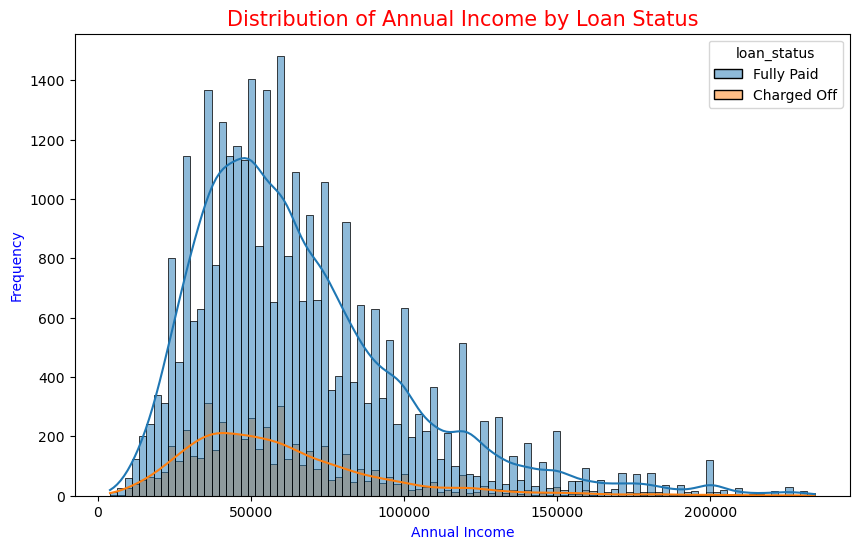

In [169]:
plt.figure(figsize=(10,6))

sns.histplot(data=loan_data, x='annual_inc', hue='loan_status', kde=True)

plt.title('Distribution of Annual Income by Loan Status', fontsize=15, color='red')
plt.xlabel('Annual Income', fontsize = 10 ,color='blue')
plt.ylabel('Frequency',fontsize = 10, color='blue')

plt.show()

1. Distribution of Annual Income is rightly skewed for both **Fully paid** and **Charged off** loan status.
2. Its indicating most of the loan applicants havig low to moderate income and very few have high income
3. **Most Applicatons with lower income have Charged Off loans**. Most of Higher annual income applicants are "Fully paid".

#### Plot - Interest rate Vs Loan status

In [172]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month'],
      dtype='object')

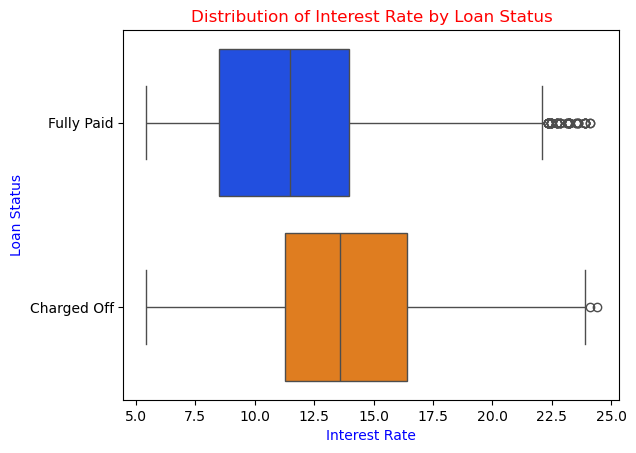

In [173]:
#plt.figure(figsize = [6,5])

sns.boxplot(data = loan_data, x = 'int_rate', y = 'loan_status',  palette = 'bright')

plt.title('Distribution of Interest Rate by Loan Status', color = 'Red')
plt.xlabel('Interest Rate', color = 'blue')
plt.ylabel('Loan Status', color = 'blue')

plt.show()

1. The median of interest rate is high for **Charged off compared to Fully paid**
2. Interest rate for "Charged off" is broarder compared to Fully Paid
3. Loan Applicants with high intereset rate have high risk of getting "Charged off"

#### Plot - Loan Amount Vs Interest Rate

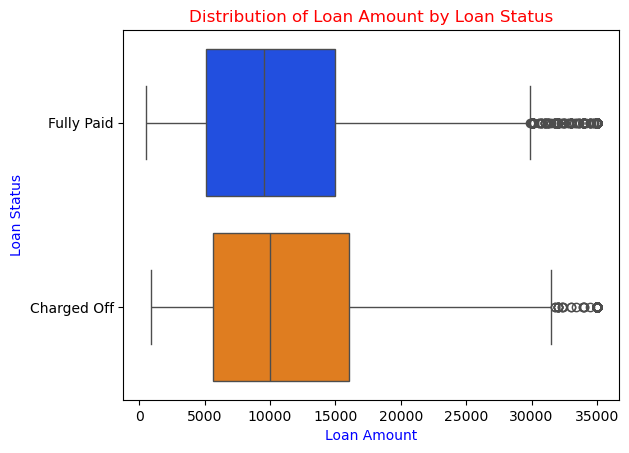

In [176]:
sns.boxplot(data = loan_data, x = 'loan_amnt', y = 'loan_status',  palette = 'bright')

plt.title('Distribution of Loan Amount by Loan Status', color = 'Red')
plt.xlabel('Loan Amount', color = 'blue')
plt.ylabel('Loan Status', color = 'blue')

plt.show()

1. Distribution of loan amount is relatively same for both. 
2. For 'Charged Off' loans 75 percentile and Upper whisker is slightly higher compated to 'Fully Paid'                                              

#### Plot - DTI vs Loan status

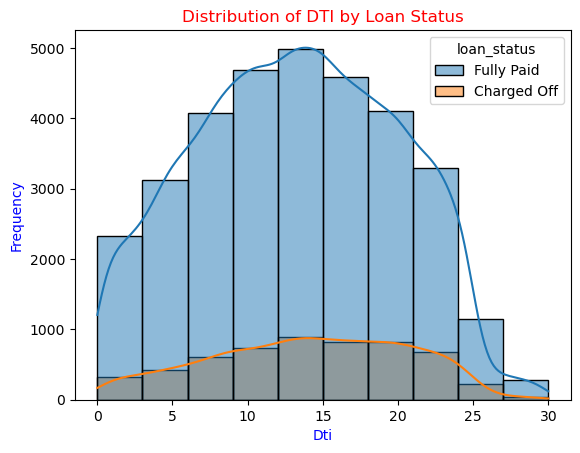

In [179]:
sns.histplot(data = loan_data, x = 'dti', hue = 'loan_status',  bins = 10, kde = True)

plt.title('Distribution of DTI by Loan Status', color = 'Red')
plt.xlabel('Dti', color = 'blue')
plt.ylabel('Frequency', color = 'blue')

plt.show()

1. For fuuly "Fully paid" there is a normal distribution
2. For "Charged Off" the distribution is consistent, the cuve is flat

#### Segment continuos data into groups

#### Segment on Loan Amount

In [183]:
loan_data1 = loan_data.copy()

In [184]:
loan_data1['loan_amnt_segment'] = pd.cut(loan_data['loan_amnt'], 
                                         bins = [0, 5000, 10000, 25000, loan_data['loan_amnt'].max()], 
                                         labels = ['Low', 'Medium', 'High', 'Very High']   )

print(loan_data1['loan_amnt_segment'].value_counts())

loan_status_crosstab = pd.crosstab(index = loan_data1['loan_amnt_segment'], columns = loan_data1['loan_status'])
print(loan_status_crosstab)

# Normalize to see the percentage distribution
loan_status_crosstab_norm = loan_status_crosstab.div(loan_status_crosstab.sum(axis = 1), axis = 0)
loan_status_crosstab_norm

loan_amnt_segment
High         14675
Medium       12737
Low           9436
Very High     1343
Name: count, dtype: int64
loan_status        Charged Off  Fully Paid
loan_amnt_segment                         
Low                       1310        8126
Medium                    1637       11100
High                      2323       12352
Very High                  314        1029


loan_status,Charged Off,Fully Paid
loan_amnt_segment,,
Low,0.138830,0.861170
Medium,0.128523,0.871477
High,0.158296,0.841704
Very High,0.233805,0.766195


<Figure size 500x450 with 0 Axes>

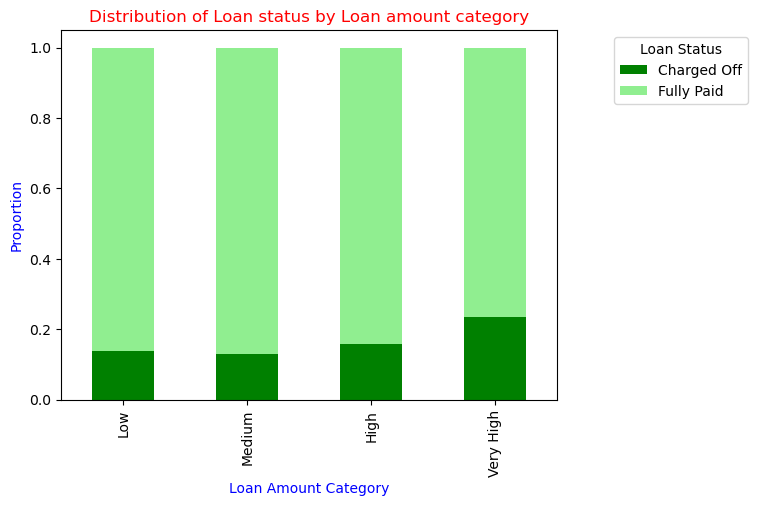

In [471]:
# draw a bar plot to see the normalization distribution
plt.figure(figsize = [5,4.5])
ax = loan_status_crosstab_norm.plot(kind = 'bar', stacked = True, color = ['Green', 'lightgreen'])

plt.title('Distribution of Loan status by Loan amount category', color = 'Red')
plt.xlabel('Loan Amount Category', color = 'blue')
plt.ylabel('Proportion', color = 'blue')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

1. Plot shows, for **Very High** Loan Amounts the **Charged Off** are more.

#### Segment on Interest Rate

In [188]:
labels = ['5-9', '10-13', '14-17','18-21','22-25']

loan_data1['int_rate_group'] = pd.cut(loan_data['int_rate'], bins = 5, labels = labels)

# normalize = True , normalize the data from 0 to 1
# Unstack() reshapes the dataframe. The unique becomes the column name
Loan_status_interest_rate = loan_data1.groupby(['int_rate_group'])['loan_status'].value_counts(normalize = True).unstack()

print(Loan_status_interest_rate)

loan_status     Charged Off  Fully Paid
int_rate_group                         
5-9                0.059949    0.940051
10-13              0.129586    0.870414
14-17              0.189575    0.810425
18-21              0.292994    0.707006
22-25              0.409002    0.590998


<Figure size 600x700 with 0 Axes>

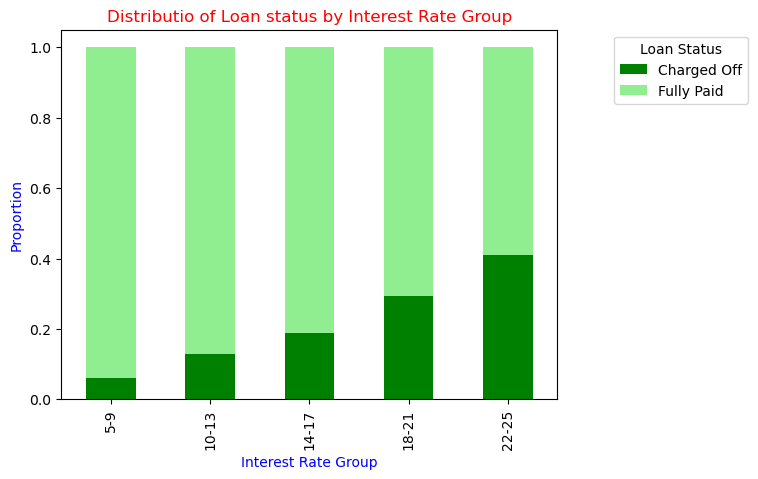

In [189]:
# Draw a bar graph
plt.figure(figsize = [6,7])

Loan_status_interest_rate.plot(kind = 'bar', stacked = True, color = ['green', 'lightgreen'])

plt.title('Distributio of Loan status by Interest Rate Group', color = 'Red')
plt.xlabel('Interest Rate Group', color = 'blue')
plt.ylabel('Proportion', color = 'blue')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

1. Plot shows - As interest increases, the proportion of **Charged Off** loans increased and at the same time the proportion of **Fully Paid** loans decrased
2. Higher Interest Rate groups 18-21% and 22-25% , loan applicants for  **Charged Off** loans increasesd. It shows higher Interest rate is a cause for "Deafults"

#### Segement on Annual Income

In [192]:
labels = ['3K-20K', '21K-30K', '31K-40K','41K-50K','51K-60K', '61K-70K','71K-80K','81K-90K','91K-100K','101k-110k', 
          '111k-120K', '121K-130K', '131K-140K', '141K-150K']

loan_data1['annual_inc_group'] = pd.cut(loan_data['annual_inc'], bins = 14, labels = labels)

loan_status_annual_income = loan_data1.groupby(['annual_inc_group'])['loan_status'].value_counts(normalize = True).unstack()
loan_status_annual_income

loan_status,Charged Off,Fully Paid
annual_inc_group,,
3K-20K,0.199521,0.800479
21K-30K,0.181279,0.818721
31K-40K,0.155915,0.844085
41K-50K,0.147300,0.852700
51K-60K,0.128503,0.871497
61K-70K,0.117081,0.882919
71K-80K,0.101567,0.898433
81K-90K,0.116359,0.883641
91K-100K,0.101370,0.898630


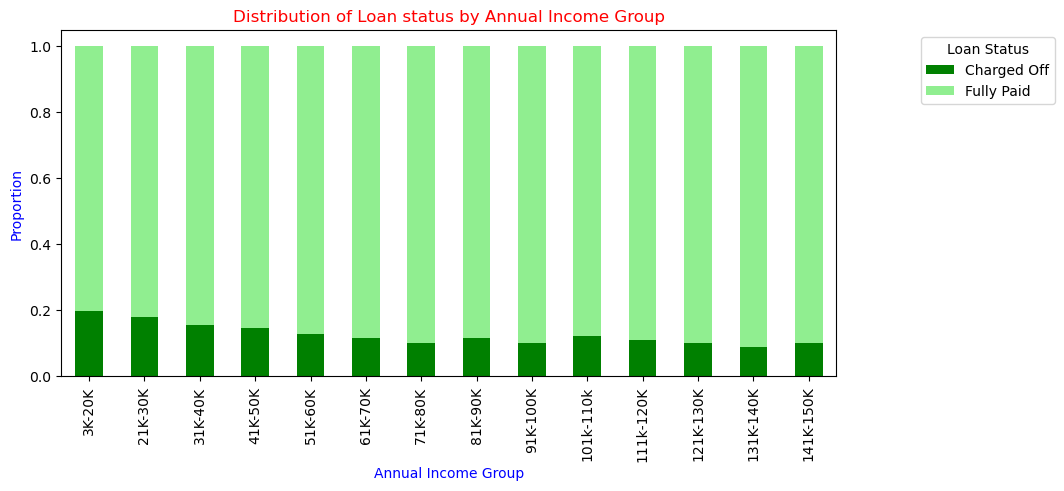

In [415]:
loan_status_annual_income.plot(kind = 'bar', stacked = True, figsize = [10,4.5] ,color = ['green', 'lightgreen'])

plt.title('Distribution of Loan status by Annual Income Group', color = 'Red')
plt.xlabel('Annual Income Group', color = 'blue')
plt.ylabel('Proportion', color = 'blue')

# add legend
plt.legend(title = 'Loan Status', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

1. Plot says - The proportion of **Charged Off loans are higher in Lower Income(3K-20K & 21K-30K) group** applicants.
2. As income increases the proportion of Charged Off loans are decrased. It indicates loer risk at higher income applicants

#### Segmented Univariate analysis for Categorical columns

In [196]:
# create a function to calculate percentage
def calculate_percentage(loan_data, col1, col2):

    # Group the data by column2 
    grouped_data = loan_data.groupby([col1, col2])[col2]

    # Calculate sum of each group
    summed_data = grouped_data.size().reset_index(name = 'count')
    
    # Calculate total count of each group
    total_count = summed_data.groupby([col2])['count'].transform('sum')
    print(f"Total count of {total_count}")

    # Calculate percentage of each group
    summed_data['percentage'] = (summed_data['count']/total_count) * 100
    print(summed_data)

    # Retunr summed_data data set
    return summed_data 

#### Plot: Term By Loan Status

Total count of 0    28819
1     9372
2    28819
3     9372
Name: count, dtype: int64
   loan_status        term  count  percentage
0  Charged Off   36 months   3201   11.107256
1  Charged Off   60 months   2383   25.426803
2   Fully Paid   36 months  25618   88.892744
3   Fully Paid   60 months   6989   74.573197


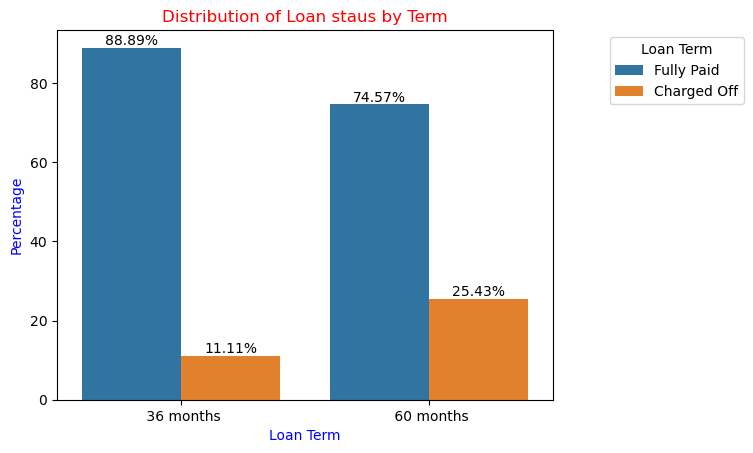

In [198]:
loan_term = calculate_percentage(loan_data, 'loan_status', 'term')


# Draw a plot for Loan term Vs Status
ax = sns.barplot(data = loan_term, x = 'term', y = 'percentage', hue = 'loan_status', 
                    hue_order = ('Fully Paid', 'Charged Off'))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")    

plt.title("Distribution of Loan staus by Term", color = 'Red')
plt.xlabel('Loan Term', color = 'blue')
plt.ylabel('Percentage', color = 'blue')

# Add legend
plt.legend(title = 'Loan Term', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

1. Plot shows, The number of ** Defaults for Charged of loan are higher in 60 months loan term than 36 months**
2. Fully paid, term 36 months loan apploicants are paying loan more than 60 months term

#### Plot: Grade By Loan Status

Total count of 0      9977
1     11581
2      7753
3      5027
4      2610
5       954
6       289
7      9977
8     11581
9      7753
10     5027
11     2610
12      954
13      289
Name: count, dtype: int64
    loan_status grade  count  percentage
0   Charged Off     A    601    6.023855
1   Charged Off     B   1414   12.209654
2   Charged Off     C   1342   17.309429
3   Charged Off     D   1112   22.120549
4   Charged Off     E    704   26.973180
5   Charged Off     F    312   32.704403
6   Charged Off     G     99   34.256055
7    Fully Paid     A   9376   93.976145
8    Fully Paid     B  10167   87.790346
9    Fully Paid     C   6411   82.690571
10   Fully Paid     D   3915   77.879451
11   Fully Paid     E   1906   73.026820
12   Fully Paid     F    642   67.295597
13   Fully Paid     G    190   65.743945


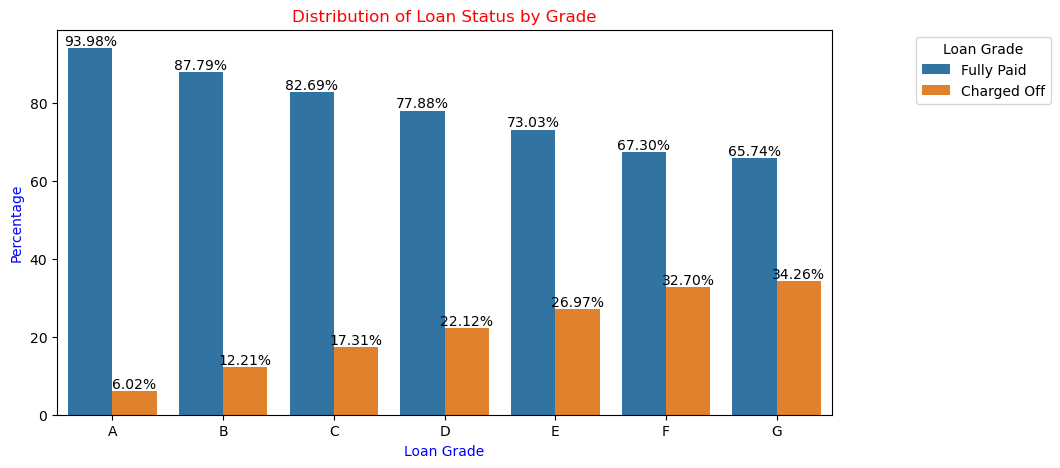

In [420]:
loan_grade = calculate_percentage(loan_data, 'loan_status', 'grade')

plt.figure(figsize = [10,5])

# Draw a plot for Loan term Vs Status
ax = sns.barplot(data = loan_grade, x = 'grade', y = 'percentage', hue = 'loan_status', hue_order = ('Fully Paid', 'Charged Off'))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%")    

plt.title("Distribution of Loan Status by Grade", color = 'Red')
plt.xlabel('Loan Grade', color = 'blue')
plt.ylabel('Percentage', color = 'blue')

# Add legend
plt.legend(title = 'Loan Grade', bbox_to_anchor=(1.10, 1), loc = 'upper left')

plt.show()

#### Plot: EmpLength By Loan Status

Total count of 0     1028
1     3143
2     8354
3     4245
4     3977
5     3315
6     3168
7     2151
8     1697
9     1419
10    1215
11    4479
12    1028
13    3143
14    8354
15    4245
16    3977
17    3315
18    3168
19    2151
20    1697
21    1419
22    1215
23    4479
Name: count, dtype: int64
    loan_status emp_length  count  percentage
0   Charged Off          0    227   22.081712
1   Charged Off     1 year    455   14.476615
2   Charged Off  10+ years   1316   15.752933
3   Charged Off    2 years    561   13.215548
4   Charged Off    3 years    551   13.854664
5   Charged Off    4 years    456   13.755656
6   Charged Off    5 years    456   14.393939
7   Charged Off    6 years    305   14.179451
8   Charged Off    7 years    262   15.439010
9   Charged Off    8 years    203   14.305849
10  Charged Off    9 years    157   12.921811
11  Charged Off   < 1 year    635   14.177272
12   Fully Paid          0    801   77.918288
13   Fully Paid     1 year   2688   85.523385
14   

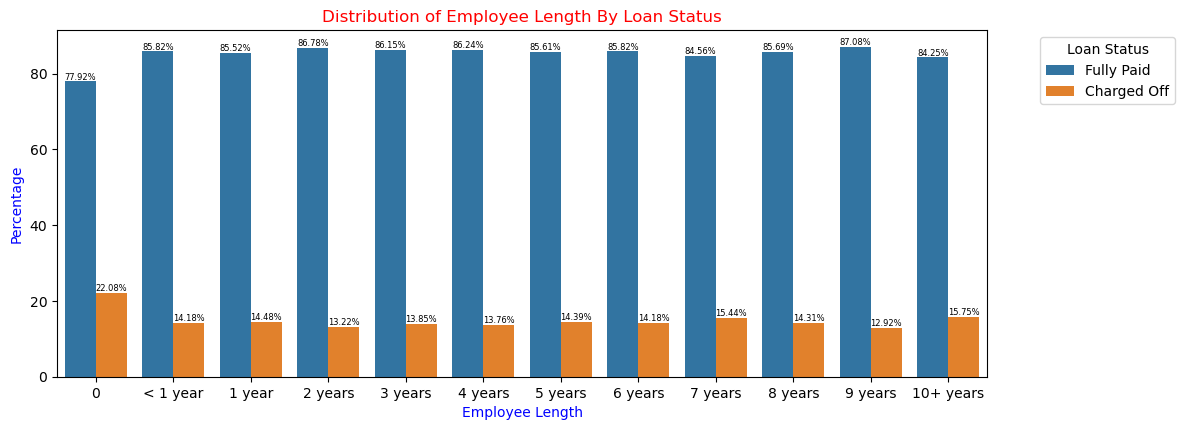

In [422]:
order_emp_length = ['0','< 1 year','1 year','2 years','3 years','4 years','5 years',
                    '6 years','7 years','8 years','9 years','10+ years']

plt.figure(figsize = [12,4.5])

# Find percentage of Employee length Vs Loan Status
loan_status_emp_length = calculate_percentage(loan_data,'loan_status', 'emp_length')

#Plot a bar plot to see the Employee length distribution with loan status
ax = sns.barplot(data = loan_status_emp_length, x = 'emp_length', y = 'percentage', hue = 'loan_status', 
                 hue_order = ['Fully Paid','Charged Off'], order = order_emp_length)

plt.title("Distribution of Employee Length By Loan Status", color = 'Red')
plt.xlabel('Employee Length', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue')

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%", fontsize = 6)

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Plot: Home Ownership By Loan Status

Total count of 0    16748
1       96
2     2947
3    18397
4    16748
5        3
6       96
7     2947
8    18397
Name: count, dtype: int64
   loan_status home_ownership  count  percentage
0  Charged Off       MORTGAGE   2302   13.744925
1  Charged Off          OTHER     18   18.750000
2  Charged Off            OWN    440   14.930438
3  Charged Off           RENT   2824   15.350329
4   Fully Paid       MORTGAGE  14446   86.255075
5   Fully Paid           NONE      3  100.000000
6   Fully Paid          OTHER     78   81.250000
7   Fully Paid            OWN   2507   85.069562
8   Fully Paid           RENT  15573   84.649671


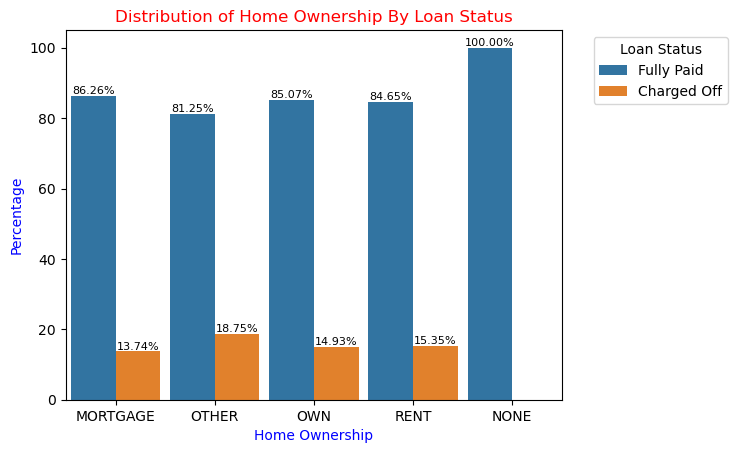

In [205]:
#plt.figure(figsize = [8,6])
# Find percentage of Home Ownership Vs Loan Status
loan_status_home_ownership = calculate_percentage(loan_data,'loan_status', 'home_ownership')

#Plot a bar plot to see the Home Ownership distribution with loan status
ax = sns.barplot(data = loan_status_home_ownership, x = 'home_ownership', y = 'percentage', hue = 'loan_status', 
                 hue_order = ['Fully Paid','Charged Off'], dodge=True, width = 0.9)

plt.title("Distribution of Home Ownership By Loan Status", color = 'Red')
plt.xlabel('Home Ownership', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue')

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f%%", fontsize = 8)

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Plot -  Purpose by Loan Status

Total count of 0      1491
1      4987
2     17917
3       323
4      2797
5       357
6      2129
7       674
8       570
9      3831
10      100
11     1723
12      375
13      917
14     1491
15     4987
16    17917
17      323
18     2797
19      357
20     2129
21      674
22      570
23     3831
24      100
25     1723
26      375
27      917
Name: count, dtype: int64
    loan_status             purpose  count  percentage
0   Charged Off                 car    160   10.731053
1   Charged Off         credit_card    537   10.767997
2   Charged Off  debt_consolidation   2752   15.359714
3   Charged Off         educational     55   17.027864
4   Charged Off    home_improvement    338   12.084376
5   Charged Off               house     58   16.246499
6   Charged Off      major_purchase    220   10.333490
7   Charged Off             medical    106   15.727003
8   Charged Off              moving     91   15.964912
9   Charged Off               other    629   16.418690
10  Charged Off   

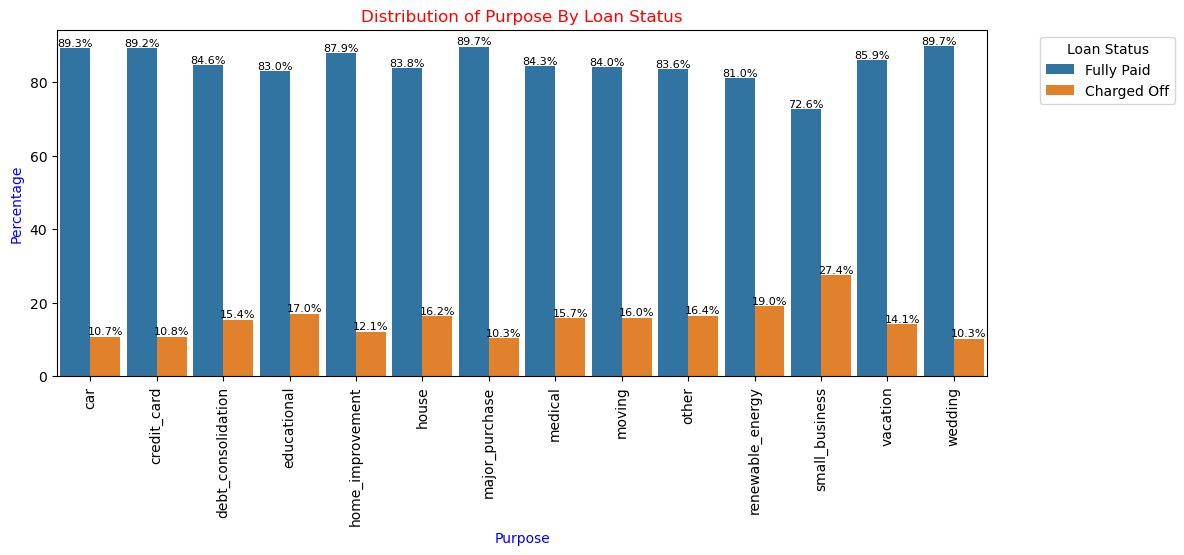

In [424]:
plt.figure(figsize = [12,4.5])

# Find percentage of Purpose Vs Loan Status
loan_status_purpose = calculate_percentage(loan_data,'loan_status', 'purpose')

#Plot a bar plot to see the Purpose distribution with loan status
ax = sns.barplot(data = loan_status_purpose, x = 'purpose', y = 'percentage', hue = 'loan_status', 
                 hue_order = ['Fully Paid','Charged Off'], width = 0.9, dodge=True)

plt.title("Distribution of Purpose By Loan Status", color = 'Red')
plt.xlabel('Purpose', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue')
plt.xticks(rotation = 90)

for container in ax.containers:
    ax.bar_label(container, fmt = "%.1f%%", fontsize = 8, label_type = 'edge')

plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Plot - Issue Years by Loan Status

In [209]:
count = loan_data1.groupby(['issue_year', 'loan_status']).size().reset_index(name = 'count')
count

,issue_year,loan_status,count
0,2007,Charged Off,43
1,2007,Fully Paid,204
2,2008,Charged Off,246
3,2008,Fully Paid,1306
4,2009,Charged Off,590
5,2009,Fully Paid,4072
6,2010,Charged Off,1466
7,2010,Fully Paid,9946
8,2011,Charged Off,3239
9,2011,Fully Paid,17079


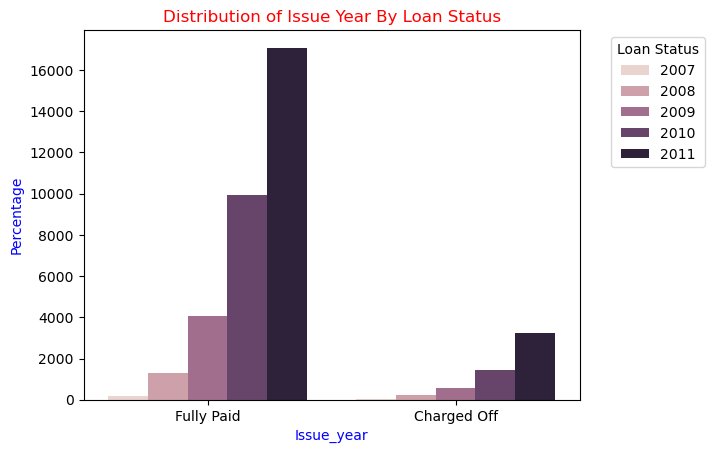

In [427]:
# Draw a count plot to see Dist Issue Year Vs Loan Status
sns.countplot(data = loan_data, x = 'loan_status', hue = 'issue_year')


plt.title("Distribution of Issue Year By Loan Status", color = 'Red')
plt.xlabel('Issue_year', color = 'Blue')
plt.ylabel('Percentage', color = 'Blue')
#plt.xticks(rotation = 90)



plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Loan Amount issued over the Years

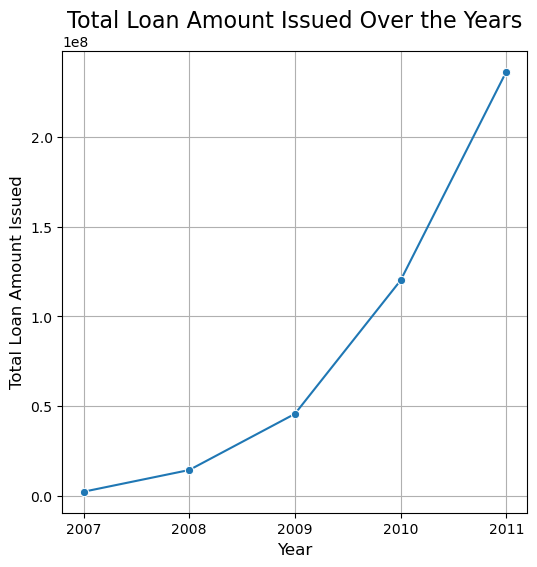

In [212]:
annual_loan_sum = loan_data.groupby('issue_year')['loan_amnt'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(6, 6))

# Line plot to show the growth of total loan amounts issued over the years
sns.lineplot(x='issue_year', y='loan_amnt', data = annual_loan_sum, marker='o')

# Add labels and title
plt.title('Total Loan Amount Issued Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Loan Amount Issued', fontsize=12)

# Display the plot
plt.xticks(annual_loan_sum['issue_year'].unique())
plt.grid()
plt.show()

1. Taking loan amount in **2011** drastically increaed comapred to over the past 
2. It is due to financial crisis in 2011

#### Loan Defaulters by every year

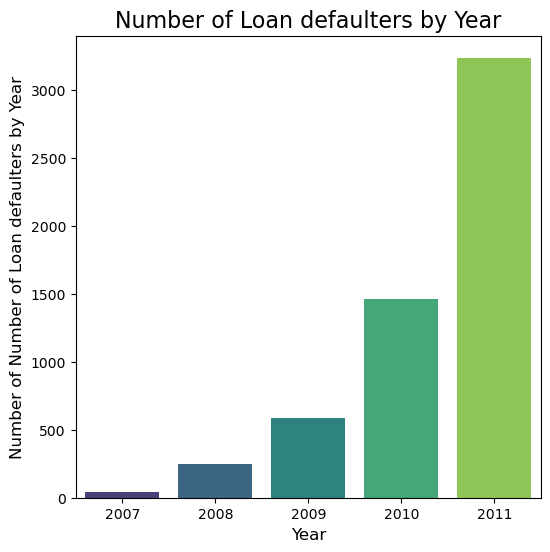

,issue_year,count
0,2007,43
1,2008,246
2,2009,590
3,2010,1466
4,2011,3239


In [215]:
# Filter the dataset for charged-off loans
charged_off_loans = loan_data[loan_data['loan_status'] == 'Charged Off']

# Group by year and count the number of charged-off loans
charged_off_count = charged_off_loans.groupby('issue_year').size().reset_index(name='count')

# Set the figure size
plt.figure(figsize=(6, 6))

# Bar plot to show the number of charged-off loans by year
sns.barplot(x='issue_year', y='count', data=charged_off_count, palette='viridis')

# Add labels and title
plt.title('Number of Loan defaulters by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Number of Loan defaulters by Year', fontsize=12)

# Display the plot
#plt.xticks(charged_off_count['issue_year'].unique())
#plt.grid(axis='y')
plt.show()
charged_off_count

1. Plot shpws number of defaulters are increaed over the years
2. But in 2011 the count is incraed more compared to past years

### Bi-variate/Multi Variate Analysis

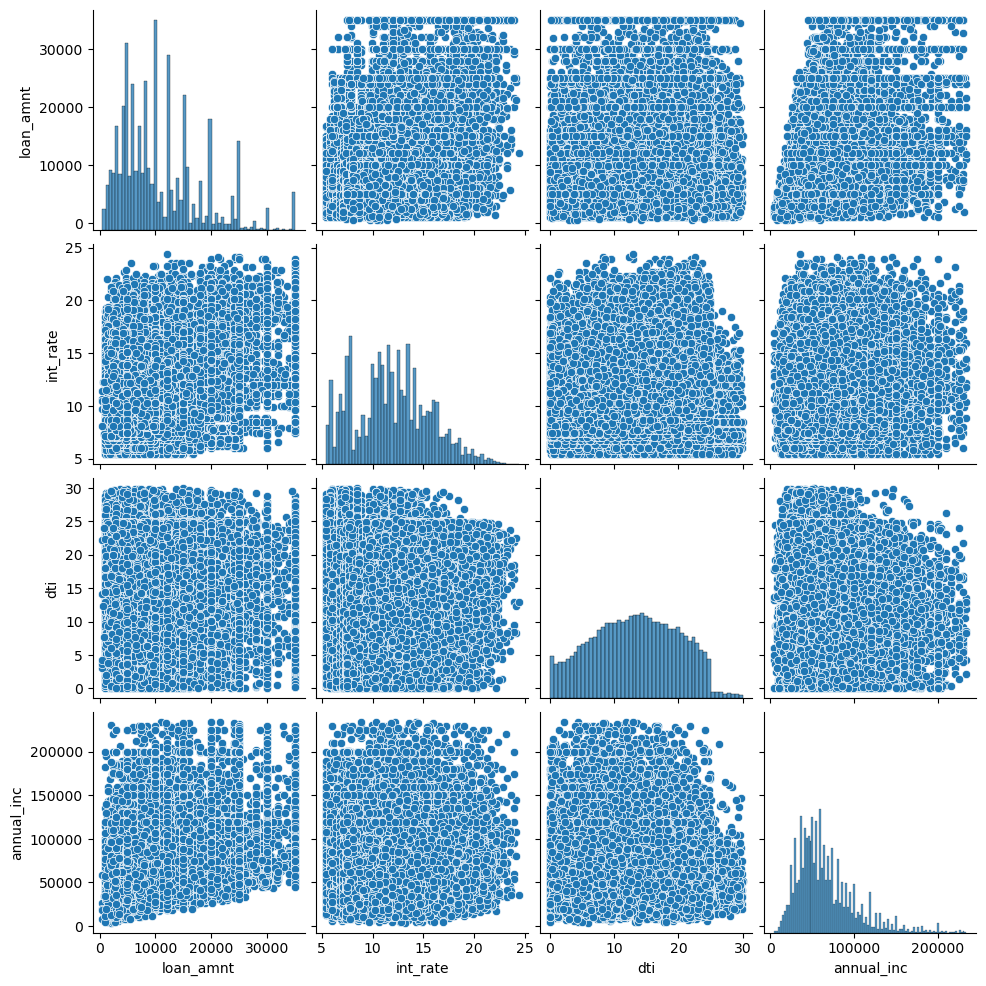

In [218]:
# Pair plot

sns.pairplot(loan_data[['loan_amnt', 'int_rate', 'dti', 'annual_inc']])
plt.show()

#### Correlation between Numerical variables

In [220]:
# Define a correlation_matrix for numeric varaibles
correlation_matrix = loan_data.corr(numeric_only = True)
correlation_matrix

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_year
loan_amnt,1.000000,0.298454,0.415012,0.071850,-0.035082,0.174397,-0.048780,0.064078,0.250885,-0.033995,0.108050
int_rate,0.298454,1.000000,0.066614,0.113470,0.156833,0.001921,0.100053,0.467461,-0.052295,0.084363,0.038047
annual_inc,0.415012,0.066614,1.000000,-0.107957,0.026817,0.262193,-0.020286,0.039122,0.378659,-0.017156,0.032536
dti,0.071850,0.113470,-0.107957,1.000000,-0.031975,0.292414,-0.005539,0.279941,0.236057,0.005028,0.092172
delinq_2yrs,-0.035082,0.156833,0.026817,-0.031975,1.000000,0.011828,0.008528,-0.042440,0.065564,0.004023,-0.003997
open_acc,0.174397,0.001921,0.262193,0.292414,0.011828,1.000000,0.000892,-0.090962,0.686489,0.007024,0.011057
pub_rec,-0.048780,0.100053,-0.020286,-0.005539,0.008528,0.000892,1.000000,0.059934,-0.022216,0.847170,-0.005614
revol_util,0.064078,0.467461,0.039122,0.279941,-0.042440,-0.090962,0.059934,1.000000,-0.071795,0.060915,0.066303
total_acc,0.250885,-0.052295,0.378659,0.236057,0.065564,0.686489,-0.022216,-0.071795,1.000000,-0.009397,0.052430
pub_rec_bankruptcies,-0.033995,0.084363,-0.017156,0.005028,0.004023,0.007024,0.847170,0.060915,-0.009397,1.000000,0.000624


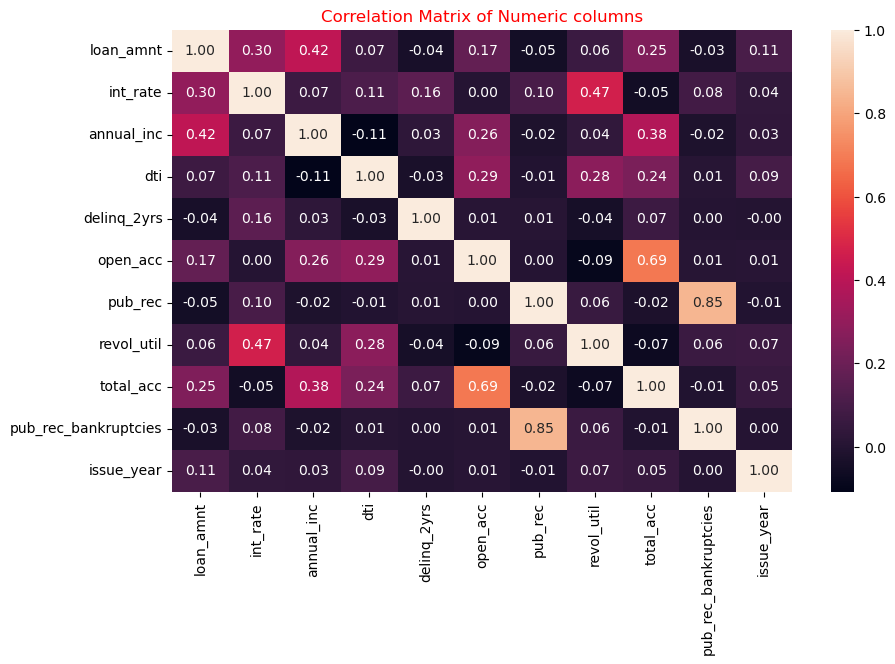

In [221]:
# Plot a heatmap for correlation matrix
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f")

plt.title("Correlation Matrix of Numeric columns", color =  'Red')
plt.show()

#### Analysis on defaulters - Charged off data set Vs non_defaulters - Fully paid

In [223]:
loan_data.shape

(38191, 21)

In [224]:
# Define Data sets for defaulaters - Charged Off
# To analuse data
defaulters = loan_data[loan_data['loan_status'] == 'Charged Off']
defaulters.shape

(5584, 21)

In [225]:
# non_defaulters  Fully Paid

non_defaulters = loan_data[loan_data['loan_status'] == 'Fully Paid']
non_defaulters.shape

(32607, 21)

### Numerical Vs Categorical

#### Interest Rate Vs Grade

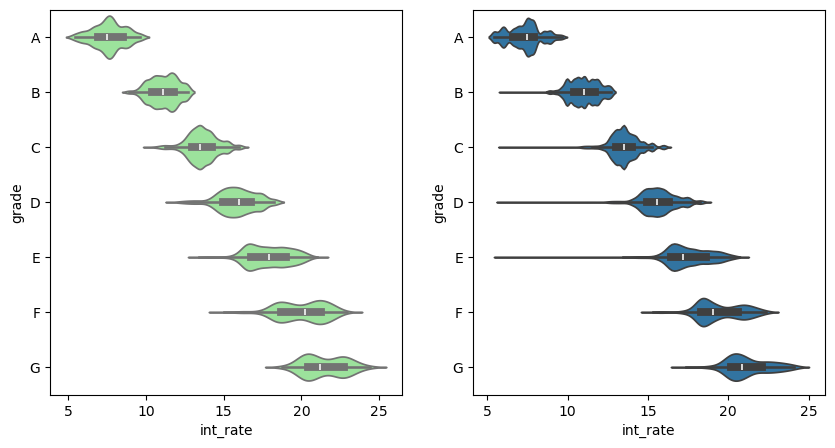

In [439]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

garde_order = ['A','B','C','D','E','F','G']

sns.violinplot(ax = axes[0], data = defaulters, x = 'int_rate', y = 'grade', order = garde_order, color = 'lightgreen')

sns.violinplot(ax = axes[1], data = non_defaulters, x = 'int_rate', y = 'grade',  order = garde_order)

plt.show()

1. The interest rates are increasing with each grade.
2. Low grades/ Low Creditworthiness (F and G) are associated with higher interest rates.
3. It seems Interest rates are higher for low grades. Lenders charging higher interest rates for risk loans.

#### Annual Income Vs Grade

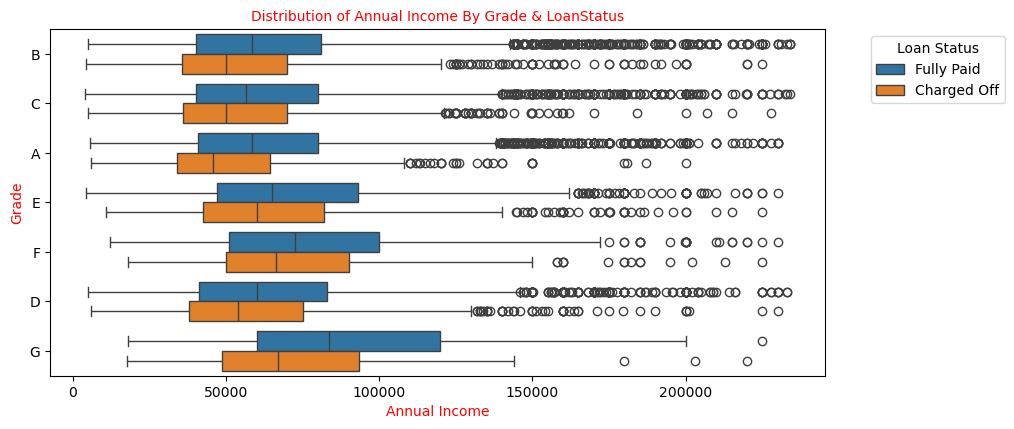

In [441]:
plt.figure(figsize = [10, 4.5])
sns.boxplot(data=loan_data, x="annual_inc",y="grade", hue='loan_status')
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribution of Annual Income By Grade & LoanStatus', fontsize=10, color='red')
plt.xlabel('Annual Income', color = 'Red')
plt.ylabel('Grade', color = 'Red')

plt.show()

1. For Low Grades [E-G], Less income is assosicated with high risk of Defaulting
2. For Fully Paid, as the Grade descreased and income increased. So more loans getting paid. 

#### Revolving Utilisation Vs Grade

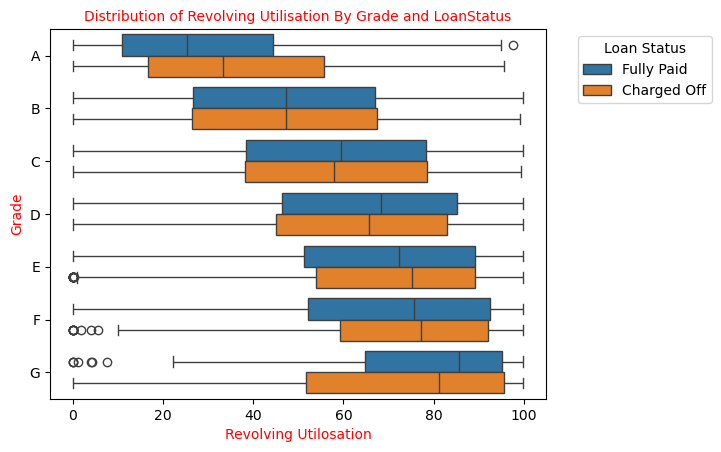

In [234]:
sns.boxplot(data = loan_data, x = "revol_util",y = "grade", hue = 'loan_status', order = ['A','B','C','D','E','F','G'])

plt.legend(title = 'Loan Status', bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.title('Distribution of Revolving Utilisation By Grade and LoanStatus', fontsize=10, color='red')
plt.xlabel('Revolving Utilosation', color = 'Red')
plt.ylabel('Grade', color = 'Red')

plt.show()

1. Revolving utilization is same across each grade for both defaulters and non-defaulters.
2. There is no significant difference in the revolving utilization between defaulters and non-defaulters within each grade.

#### Interest Rate Vs Term and Loan Amount Vs Term

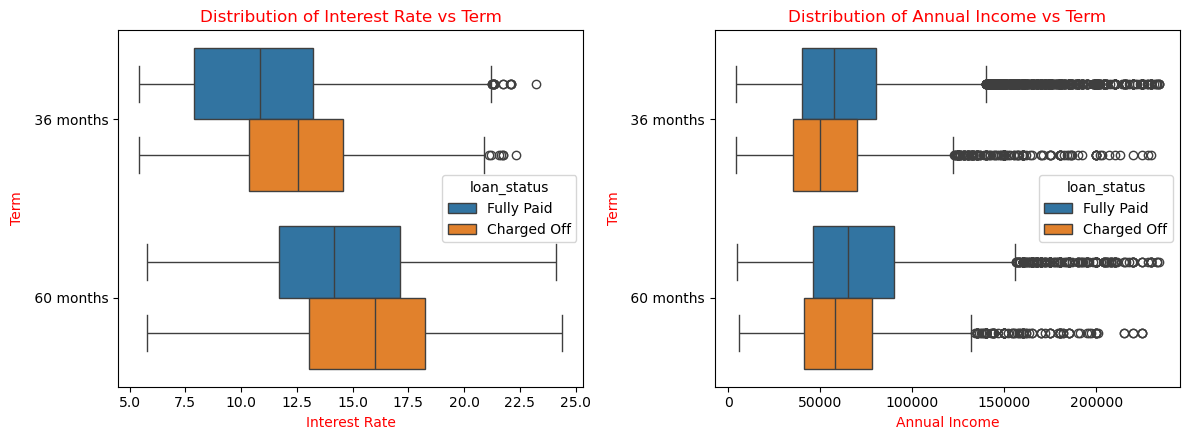

In [444]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

sns.boxplot(ax = axes[0], data = loan_data, x = "int_rate", y = "term", hue = 'loan_status')
axes[0].set_title("Distribution of Interest Rate vs Term", color = 'red', fontsize = 12)
axes[0].set_xlabel('Interest Rate', color = 'Red', fontsize = 10)
axes[0].set_ylabel('Term', color = 'Red', fontsize = 10)

sns.boxplot(ax = axes[1],data = loan_data, x = "annual_inc",y = "term",hue = 'loan_status')
axes[1].set_title("Distribution of Annual Income vs Term", color = 'red', fontsize = 12)
axes[1].set_xlabel('Annual Income', color = 'Red', fontsize = 10)
axes[1].set_ylabel('Term', color = 'Red', fontsize = 10)

plt.tight_layout()
plt.show()

1. **Interest Rate vs Term**
   Higher interest rates are associated with a higher proportion of charged-off loans. 
   The impact of Term on Interest Rate for Fully Paid and charged off is similar.
2. **Annual Income vs Term**
   Lower the Annual Income , then higher is the chance to get Charged Off

#### Loan Amount Vs Emp Length and Interest Rate Vs Emp Length

In [240]:
order_emp_length = ['0','< 1 year','1 year','2 years','3 years','4 years','5 years',
                    '6 years','7 years','8 years','9 years','10+ years']

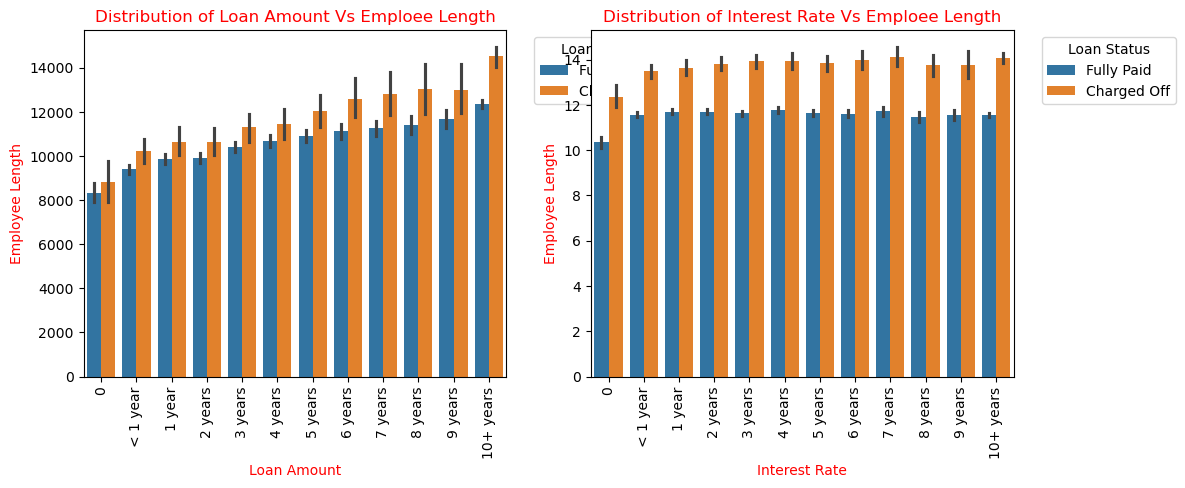

In [446]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# Draw a barplot Loan_amt Vs emp_length
sns.barplot(ax = axes[0], data = loan_data, x = "emp_length", y = "loan_amnt", hue = 'loan_status',order = order_emp_length)
axes[0].set_title("Distribution of Loan Amount Vs Emploee Length", color='red')
axes[0].set_xlabel('Loan Amount', color = 'Red', fontsize = 10)
axes[0].set_ylabel('Employee Length', color = 'Red', fontsize = 10)
axes[0].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Draw a barplot int_rate Vs emp_length
sns.barplot(ax = axes[1], data = loan_data, x = "emp_length",y = "int_rate",hue = 'loan_status',order = order_emp_length)
axes[1].set_title("Distribution of Interest Rate Vs Emploee Length", color='red')
axes[1].set_xlabel('Interest Rate', color = 'Red', fontsize = 10)
axes[1].set_ylabel('Employee Length', color = 'Red', fontsize = 10)
axes[1].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to 90 degrees in both subplots
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

1. **Employee Length and Loan Amount:** 
 Applicants with longer employment length have higher loan amounts, then the less employment length.
2. **Employee Length and Interest Rates:** 
    Applicants with shorter employment lengths are having higher interest rates, 
    and "Charged Off" loans generally have higher interest rates than "Fully Paid" loans.

#### Interest Rate Vs Home Ownership and Loan Amount Vs Home Ownership

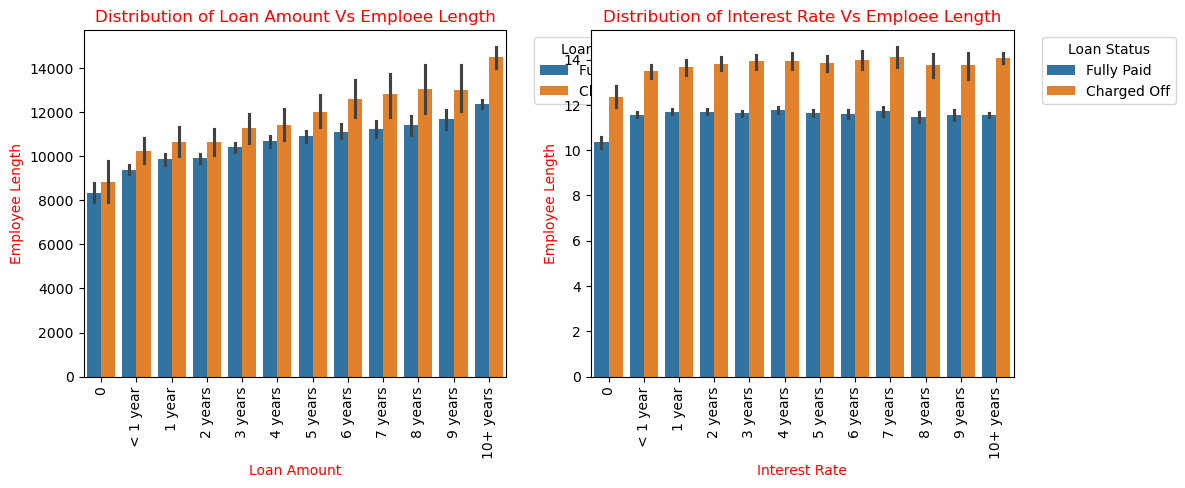

In [449]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# Draw a barplot Loan_amt Vs emp_length
sns.barplot(ax = axes[0], data = loan_data, x = "emp_length", y = "loan_amnt", hue = 'loan_status',order = order_emp_length)
axes[0].set_title("Distribution of Loan Amount Vs Emploee Length", color='red')
axes[0].set_xlabel('Loan Amount', color = 'Red', fontsize = 10)
axes[0].set_ylabel('Employee Length', color = 'Red', fontsize = 10)
axes[0].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Draw a barplot int_rate Vs emp_length
sns.barplot(ax = axes[1], data = loan_data, x = "emp_length",y = "int_rate",hue = 'loan_status',order = order_emp_length)
axes[1].set_title("Distribution of Interest Rate Vs Emploee Length", color='red')
axes[1].set_xlabel('Interest Rate', color = 'Red', fontsize = 10)
axes[1].set_ylabel('Employee Length', color = 'Red', fontsize = 10)
axes[1].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to 90 degrees in both subplots
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

1. **Interest Rate vs Home Ownership**
    Plot says defaulted have higher interest rates compared to fully paid loans, across all categories.
     This suggests that higher interest rates can be a risk factor for loan defaults.
2. **Loan Amount vs Home Ownership** 
    . Plot says loan amount is high for Defualters in all Categories. 
      In this loan applicants with mortgages and other home ownership status tend to have higher loan amounts if they default.

#### Interest Rate Vs Purpose and Loan Amount Vs Purpose

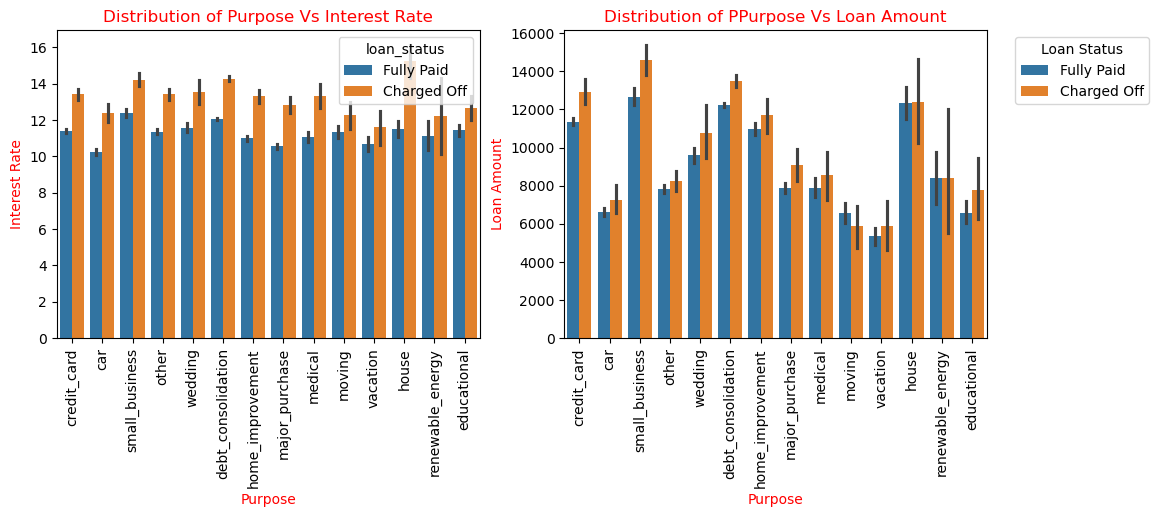

In [451]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Draw a barplot int_rate Vs purpose
sns.barplot(ax = axes[0], data = loan_data, x = "purpose", y = "int_rate", hue = 'loan_status')
axes[0].set_title("Distribution of Purpose Vs Interest Rate", color='red')
axes[0].set_xlabel('Purpose', color = 'Red', fontsize = 10)
axes[0].set_ylabel('Interest Rate', color = 'Red', fontsize = 10)
#axes[0].legend(title='Loan Status', bbox_to_anchor=(0.8, 1), loc='upper left')

# Draw a barplot purpose Vs loan_amnt
sns.barplot(ax = axes[1], data = loan_data, x = "purpose",y = "loan_amnt",hue = 'loan_status')
axes[1].set_title("Distribution of PPurpose Vs Loan Amount", color='red')
axes[1].set_xlabel('Purpose', color = 'Red', fontsize = 10)
axes[1].set_ylabel('Loan Amount', color = 'Red', fontsize = 10)
axes[1].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to 90 degrees in both subplots
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.show()

#### Annual Income Vs Purpose and DTI Vs Purpose

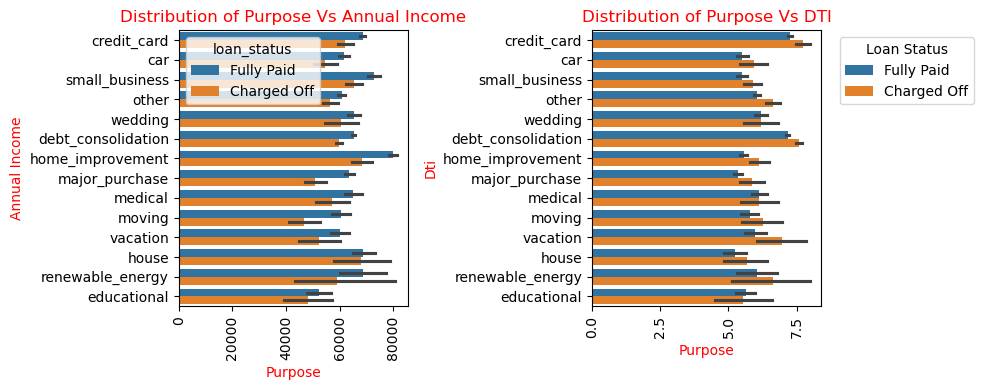

In [479]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Draw a barplot int_rate Vs purpose
sns.barplot(ax = axes[0], data = loan_data, y = "purpose", x = "annual_inc", hue = 'loan_status')
axes[0].set_title("Distribution of Purpose Vs Annual Income", color='red')
axes[0].set_xlabel('Purpose', color = 'Red', fontsize = 10)
axes[0].set_ylabel('Annual Income', color = 'Red', fontsize = 10)

#axes[0].legend(title='Loan Status', bbox_to_anchor=(0.8, 1), loc='upper left')

# Draw a barplot purpose Vs loan_amnt
sns.barplot(ax = axes[1], data = loan_data, y = "purpose",x = "dti",hue = 'loan_status')
axes[1].set_title("Distribution of Purpose Vs DTI", color='red')
axes[1].set_xlabel('Purpose', color = 'Red', fontsize = 10)
axes[1].set_ylabel('Dti', color = 'Red', fontsize = 10)
axes[1].legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels to 90 degrees in both subplots
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

1. **Interest Rate vs. Purpose:**
    Interest rates for "Charged Off" loans are high when compared to "Fully Paid"
    For House and Small Business the rates are exceptionally high for "Charged Off" loans.
2. **Loan Amount vs. Purpose:**
    Loan amounts tend to be higher for loans that were "Charged Off" compared to "Fully Paid"
3. **Annual Income vs. Purpose:**
    Annual income levels tend to be higher for "Fully Paid" loans compared to "Charged Off" loans for most purposes.
4. **DTI vs. Purpose:**
    DTI ratios for "Charged Off" loans are generally higher compared to "Fully Paid" loans across most loan purposes.
5. **Summary:**
 **Higher interest rates, larger loan amounts for purposes like "small_business" and "home_improvement", higher DTI ratios
      are more likely to be charged off.**

#### Interest Rate Vs Issue Year and Interest Rate Vs Issue Month By Loan Status

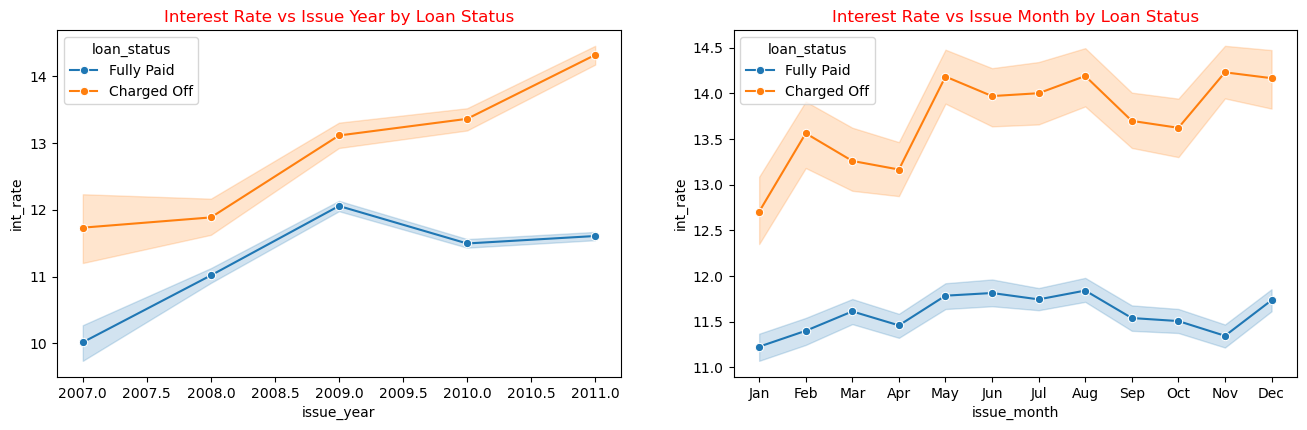

In [475]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4.5))

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert issue_month as a Categorical column.
# Categorical data is stored more efficiently than object data, especially when the number of unique values is relatively small.
loan_data['issue_month'] = pd.Categorical(loan_data['issue_month'], categories = month_order, ordered = True)


sns.lineplot(ax = axes[0], y = "int_rate", x = "issue_year", hue = 'loan_status', data = loan_data, marker = 'o')
axes[0].set_title('Interest Rate vs Issue Year by Loan Status', color = 'red')


sns.lineplot(ax = axes[1],y = "int_rate", x = "issue_month", hue = 'loan_status', data = loan_data, marker = 'o')
axes[1].set_title('Interest Rate vs Issue Month by Loan Status', color = 'red')


plt.show()

**Interest Rate vs Issue Year**
1. Interest rates for "Charged Off" loans increase significantly over the years, peaking around 2011.
2. Interest rates for "Fully Paid" loans also increase over the years but at a slower rate 

**Interest Rate vs Issue Month**
1. Interest rates for "Charged Off" loans are generally higher across all months, with noticeable peaks in May, Aug and November.
2. Interest rates for "Fully Paid" loans show less variability and generally lower values across the months

#### Loan Amount Vs Issue Year By Loan Statusa and Loan Amount Vs Issue Month By Loan Status

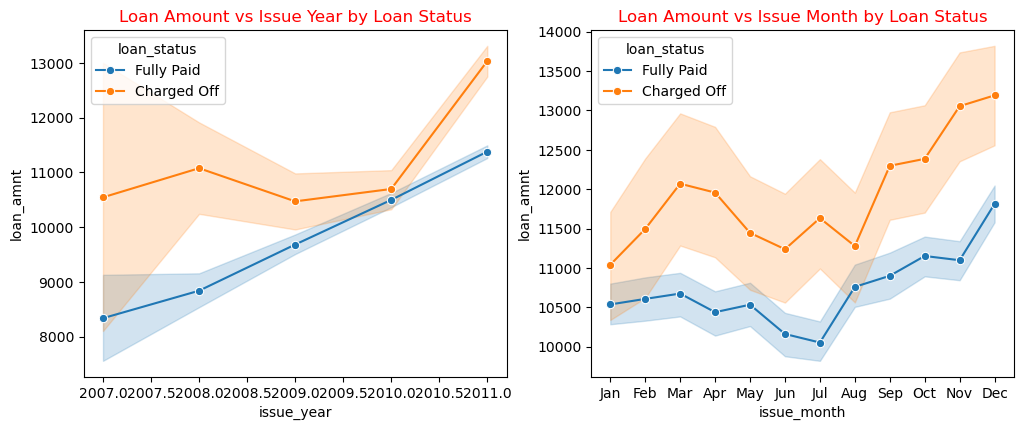

In [473]:
fig, axes = plt.subplots(1, 2, figsize=(12,4.5))

sns.lineplot(ax = axes[0], data = loan_data, x = "issue_year", y = "loan_amnt", hue = 'loan_status', marker='o')
axes[0].set_title('Loan Amount vs Issue Year by Loan Status',color='red')


sns.lineplot(ax = axes[1], data = loan_data, x = "issue_month", y= "loan_amnt", hue = 'loan_status', marker='o')
axes[1].set_title('Loan Amount vs Issue Month by Loan Status',color='red')


plt.show()

**Loan Amount vs Issue Year**
   1. Loan Amounts for Charged Off are usually higher when compared to Fully Paid across all the Years
   2. For Fully Paid loans the loan amount has increased consistently over years and observed peak in 2011
   3. For Charged Off loans, we can see it increased and deacreased till 2010 and observed a sudden peak in 2011
      
**Loan Amount vs Issue Month**
   1. Loan Amounts for Charged Off are usually higher when compared to Fully Paid across all Months
   2. For "Fully Paid" loans show less variability till for first few months and increased in later months of the year.
   3. For Charged Off loans show high variability and increased in later months of the year.

#### pub_rec_bankruptcies By Grade and Loan Status

In [258]:
pivot_pub_bankrupt = pd.pivot_table(loan_data, index = ['grade','loan_status'], values="pub_rec_bankruptcies", aggfunc = np.sum).reset_index()
pivot_pub_bankrupt

# Calculate Sum of "pub_rec_bankruptcies" over the "Grade"
total_delinq_by_grade = pivot_pub_bankrupt.groupby('grade')['pub_rec_bankruptcies'].transform('sum')

# Calculate the proportion of delinquencies
pivot_pub_bankrupt['proportion'] = pivot_pub_bankrupt['pub_rec_bankruptcies'] / total_delinq_by_grade
pivot_pub_bankrupt

,grade,loan_status,pub_rec_bankruptcies,proportion
0,A,Charged Off,9.0,0.070312
1,A,Fully Paid,119.0,0.929688
2,B,Charged Off,71.0,0.135496
3,B,Fully Paid,453.0,0.864504
4,C,Charged Off,101.0,0.219089
5,C,Fully Paid,360.0,0.780911
6,D,Charged Off,87.0,0.307420
7,D,Fully Paid,196.0,0.692580
8,E,Charged Off,61.0,0.369697
9,E,Fully Paid,104.0,0.630303


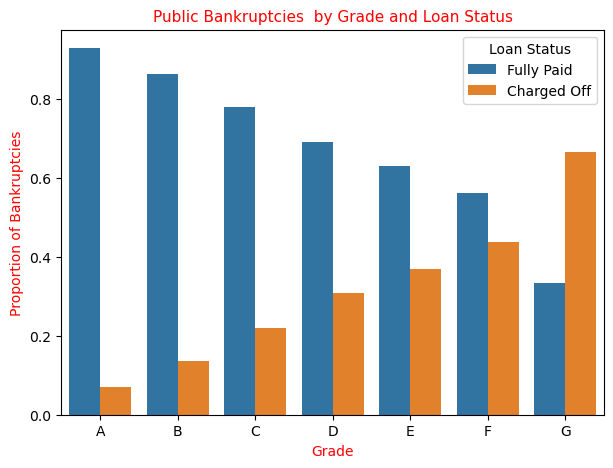

In [259]:
plt.figure(figsize=(7, 5))
sns.barplot(data = pivot_pub_bankrupt, x = 'grade', y = 'proportion', hue = 'loan_status', hue_order = ['Fully Paid','Charged Off'])
plt.title('Public Bankruptcies  by Grade and Loan Status', fontsize=11, color ='red')
plt.xlabel('Grade', color = 'Red')
plt.ylabel('Proportion of Bankruptcies', color = 'Red')
plt.legend(title = 'Loan Status')
plt.show()

#### Correlation between two catg variables for ChargedOff Data

#### Issue Year Vs Grade

In [262]:
issue_year_grade = pd.crosstab(defaulters['issue_year'], defaulters['grade'])
issue_year_grade

grade,A,B,C,D,E,F,G
issue_year,,,,,,,
2007,1,6,14,15,5,2,0
2008,17,74,77,54,12,10,2
2009,79,155,175,113,50,10,8
2010,133,396,365,298,180,69,25
2011,371,783,711,632,457,221,64


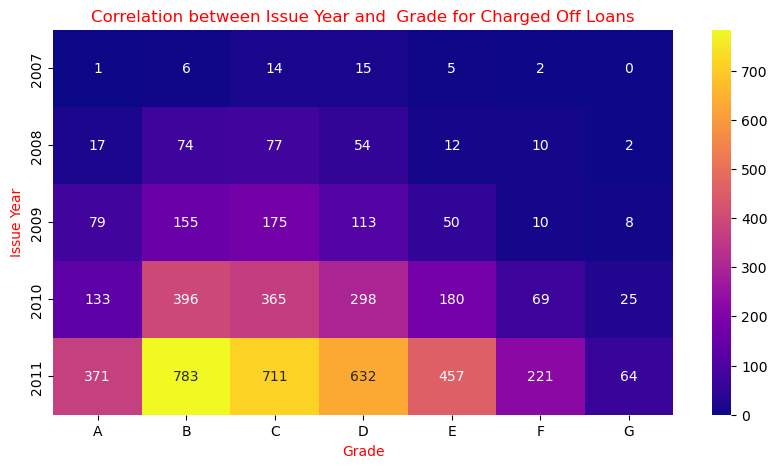

In [461]:
plt.figure(figsize = [10,5])
sns.heatmap(issue_year_grade, annot=True, fmt="d", cmap = 'plasma')
plt.title('Correlation between Issue Year and  Grade for Charged Off Loans' , color = 'Red')
plt.xlabel('Grade', color = 'Red')
plt.ylabel('Issue Year', color = 'Red')
plt.show()

1. More number of Charged Off loans have been defaulted across B,C,D,E category across the years. But in 2011 the numbers increased drastically

#### Home Ownership Vs Employee Length

In [266]:
homeownership_emplen = pd.crosstab(defaulters['home_ownership'], defaulters['emp_length'])
homeownership_emplen

emp_length,0,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
home_ownership,,,,,,,,,,,,
MORTGAGE,82,137,744,169,201,173,196,130,116,102,78,174
OTHER,0,4,5,2,3,0,1,0,1,0,0,2
OWN,42,28,98,43,38,27,36,27,22,13,14,52
RENT,103,286,469,347,309,256,223,148,123,88,65,407


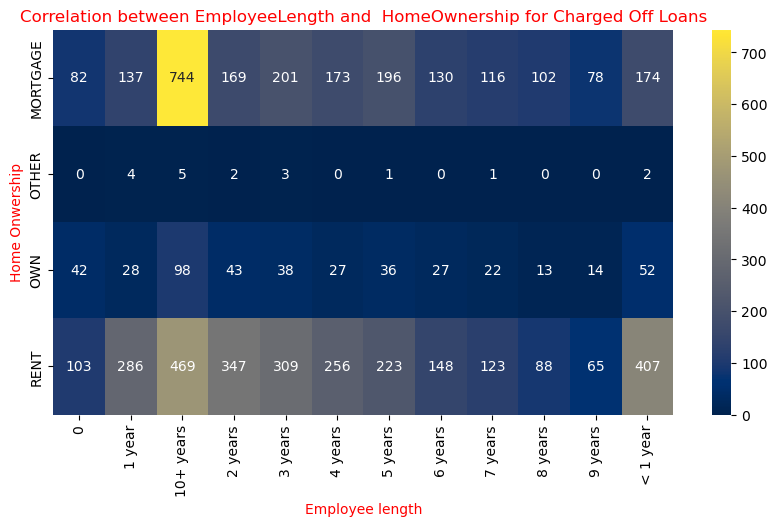

In [464]:
plt.figure(figsize = [10,5])
sns.heatmap(homeownership_emplen, annot=True, fmt="d", cmap = 'cividis')

plt.title('Correlation between EmployeeLength and  HomeOwnership for Charged Off Loans' , color = 'Red')
plt.xlabel('Employee length', color = 'Red')
plt.ylabel('Home Onwership', color = 'Red')

plt.show()

1. Charged Off Applicants with home ownership status as Mortgage with 10+ years employment have defaulted most

#### Purpose Vs Employee Length

In [270]:
purpose_emplength = pd.crosstab(defaulters['purpose'], defaulters['emp_length'])
purpose_emplength

emp_length,0,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
purpose,,,,,,,,,,,,
car,5,17,32,11,17,15,12,10,11,5,3,22
credit_card,32,39,121,45,51,48,52,34,30,16,15,54
debt_consolidation,88,209,698,272,261,211,221,166,134,109,91,292
educational,4,5,4,8,7,8,4,0,1,0,1,13
home_improvement,17,27,98,32,26,23,32,14,14,12,11,32
house,0,5,14,11,3,5,2,4,5,3,1,5
major_purchase,11,20,42,23,32,15,21,13,4,5,5,29
medical,5,11,25,10,10,7,6,5,6,6,0,15
moving,8,12,7,10,7,9,8,2,1,4,4,19


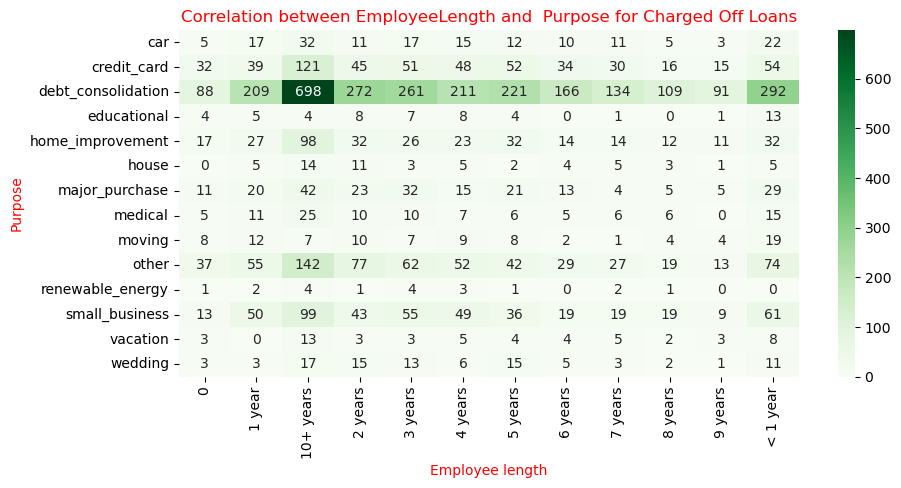

In [468]:
plt.figure(figsize =[10,4.5])
sns.heatmap(purpose_emplength, annot=True, fmt="d", cmap = 'Greens')
plt.title('Correlation between EmployeeLength and  Purpose for Charged Off Loans' , color = 'Red')
plt.xlabel('Employee length', color = 'Red')
plt.ylabel('Purpose', color = 'Red')

plt.show()

1. It is observed more number of Charged Off appicants with 10+ Years employment have been granted loan taken for the purpose of debt_consolidation